# Bike Sharing Assignement | Multiple Linear Regression

<span class="mark">Problem Statement:</span> 
- <b style='color:red;'>Description of the industry:</b> A bike-sharing system is a service in which bikes are made available for shared use to individuals on a short term basis for a price or free. Many bike share systems allow people to borrow a bike from a "dock" which is usually computer-controlled wherein the user enters the payment information, and the system unlocks it. This bike can then be returned to another dock belonging to the same system.

- <b style='color:red;'>Business Problem:</b> A US bike-sharing provider BoomBikes has recently suffered considerable dips in their revenues due to the ongoing Corona pandemic. The company is finding it very difficult to sustain in the current market scenario. So, it has decided to come up with a mindful business plan to be able to accelerate its revenue as soon as the ongoing lockdown comes to an end, and the economy restores to a healthy state. 

- <b style='color:red;'>What do we need to find?:</b> They have contracted a consulting company to understand the factors on which the demand for these shared bikes depends. Specifically, they want to understand the factors affecting the demand for these shared bikes in the American market. The company wants to know:
  - Which variables are significant in predicting the demand for shared bikes.
  - How well those variables describe the bike demands
 

# Table of Contents:
1. <b style='color:green;'>Understanding the data:</b>
   - Importing the libraries and reading the data
   - Check the dataset for anomolies
   - Fix data types, missing values or impute
   - Visualize the data
   
2. <b style='color:green;'>Data Preparation:</b>
   - Create dummy variables and binary numbers
   - Split the data into trainning and set
   - Re-scale the variables
   
3. <b style='color:green;'>Trainning the Data:</b>
   - Use RFE to check the top 10 variables
   - Use manual and business understanding to check other variables also.
4. <b style='color:green;'>Residual Analysis:</b>
   - Plot residual errors 
5. <b style='color:green;'>Prediction on Test setup:</b>
   - Use same variables to test the test set
   - Using R2 compare the r-score


# 1. <b style='color:green;'>Understanding the data:</b>
- Import the Libraries
- Import the data and views it columns
- Check all the statistics and data types of the data
- Visualize the numerical and categorical data


In [1]:
# Import the libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
pd.set_option('display.max_columns', None)

In [2]:
# Import the data into the python notebook
data=pd.read_csv('day.csv')
data.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [3]:
# Check the null value and their data structures
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [4]:
# Check the cells and columns of the data set
data.shape

(730, 16)

- <b style='color:red;'>Note:</b> Data Types of the data are not in correct formal. With this, even the columns like season, year, month and etc are not in binary encoding which might be a problem if we want to make the model. Even if we want to visualize the variables, we need them in object formal not in int64. There are two extra columns "isntant" and 'dteday' which is not serving any purpose.Dteday already has it's information extracted and thus we would not need that columns. There are no missing values in the data

In [5]:
# Drop 'instant' and dteday column as 'instant' does not serve any purpose and dteday column vital informations have been extracted
data.drop(['instant'],axis=1,inplace=True)
data.drop(['dteday'],axis=1,inplace=True)

In [6]:
# Replace season binary numbers into meaningful categories. This would change the dtype to object too.
data['season'].replace({1:'spring',2:'summer',3:'fall',4:'winter'},inplace=True)

In [7]:
# Change column 'yr' columns sub-variables from 0 and 1 to more meaningful names.This would change the dtype to object too.
data['yr'].replace({0:'2018',1:'2019'},inplace=True)

In [8]:
# Change the month encoding to meaningful categories. This would change the dtype to object too.
data['mnth'].replace({1:'Jan',2:'Feb',3:'Mar',4:'Apr',5:'May',6:'June',7:'July',8:'Aug',9:'Sept',10:'Oct',11:'Nov',12:'Dec'},inplace=True)

In [9]:
# Change column 'holiday' into meaninfgul names. This would change the dtype to object too.
data['holiday'].replace({0:'No Holiday',1:'Holiday'},inplace=True)

In [10]:
# Change the weekday column encoding to meaningful categories. This would change the dtype to object too.
data['weekday'].replace({0:'Mon',1:'Tue',2:'Wed',3:'Thurs',4:'Fri',5:'Sat',6:'Sun'},inplace=True)

In [11]:
# Change column 'workingday' sub-variable into more meaninfgul name. This would change the dtype to object too.
data['workingday'].replace({0:'workingday',1:'Holiday_w'},inplace=True)

In [12]:
# Change the weekday column encoding to meaningful categories. This would change the dtype to object too.
data['weathersit'].replace({1:'Clear',2:'Cloudy',3:'Light Rain',4:'Heavy Rain'},inplace=True)

# 2. EDA
- Boxplot of all the categorical vairbales against our target variable 'cnt'
- Scatter Plot of all the numerical variable against our target variable 'cnt'
- Co-relations of all the variables against each other

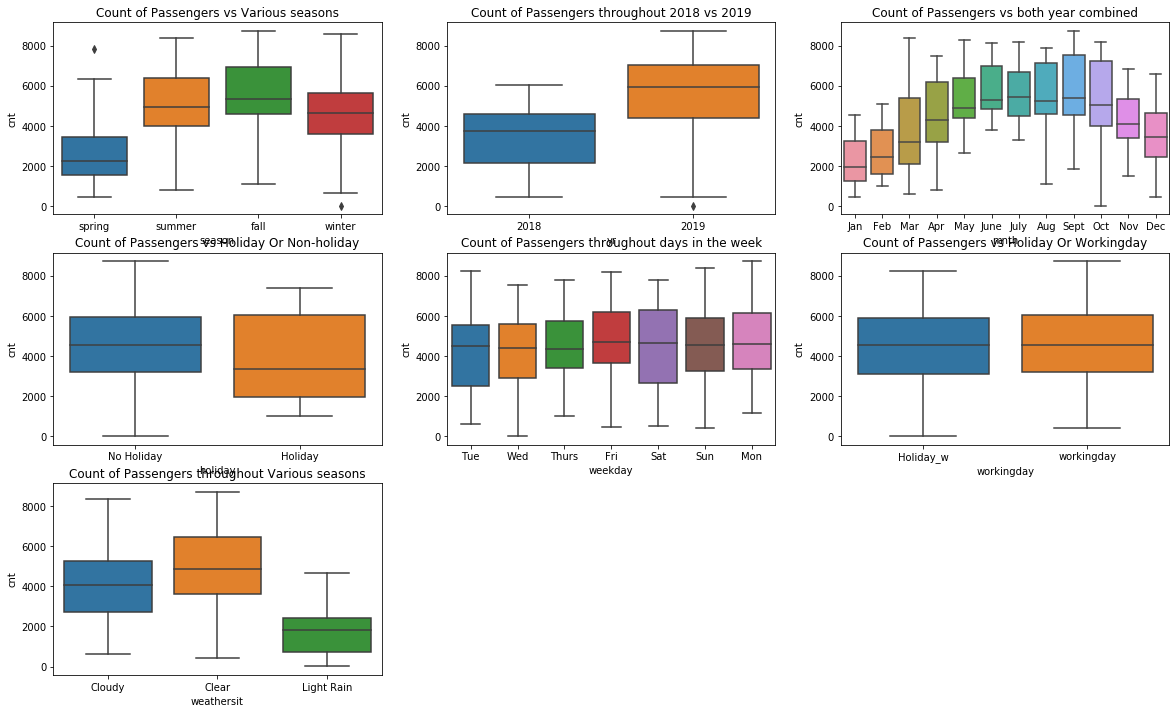

In [13]:
# Plotting box plot for categorical variables against 'cnt'
plt.figure(figsize=(20,12)) ## to control the figure size

plt.subplot(3,3,1)
sns.boxplot(x='season',y='cnt',data=data).set_title('Count of Passengers vs Various seasons')

plt.subplot(3,3,2)
sns.boxplot(x='yr',y='cnt',data=data).set_title('Count of Passengers throughout 2018 vs 2019')

plt.subplot(3,3,3)
sns.boxplot(x='mnth',y='cnt',data=data).set_title('Count of Passengers vs both year combined')

plt.subplot(3,3,4)
sns.boxplot(x='holiday',y='cnt',data=data).set_title('Count of Passengers vs Holiday Or Non-holiday')

plt.subplot(3,3,5)
sns.boxplot(x='weekday',y='cnt',data=data).set_title('Count of Passengers throughout days in the week')

plt.subplot(3,3,6)
sns.boxplot(x='workingday',y='cnt',data=data).set_title('Count of Passengers vs Holiday Or Workingday')

plt.subplot(3,3,7)
sns.boxplot(x='weathersit',y='cnt',data=data).set_title('Count of Passengers throughout Various seasons')

plt.show()

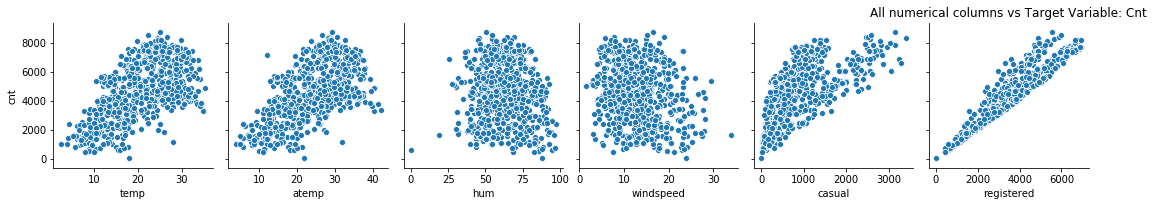

In [14]:
# Plotting scatter plot for numerical variables against our target variable 'cnt'
sns.pairplot(data,x_vars=["temp", "atemp", "hum",'windspeed','casual','registered'], y_vars=['cnt'])
plt.title("All numerical columns vs Target Variable: Cnt")
plt.show()

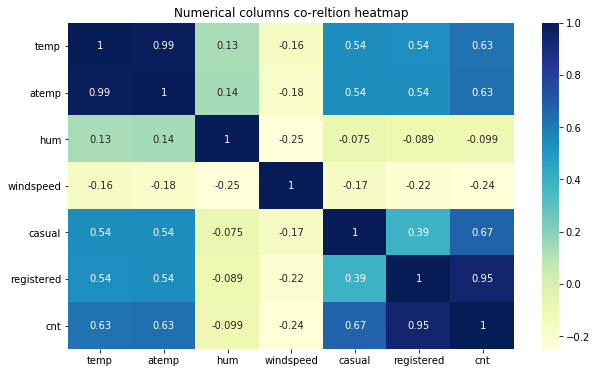

In [15]:
# Heatmap of all variables against each other to see ther co-relations
plt.figure(figsize=(10,6))
sns.heatmap(data.corr(),annot=True,cmap='YlGnBu')
plt.title("Numerical columns co-reltion heatmap")
plt.show()

# Data Preparation
- Create dummy variables for all the categorical variables like 0 and 1
  - We need to convert them into dummy variables, because machines does not understand their indivisual meanings. 
- Splitting into test and trainning set
  - Split the whole dataset into 70:30 trainning and testing set. 
- Re-scaling the variables
  - We need to scale the numerical columns also because they range from 12 to 1349 which would increase our    processing time and also not give us clear co-efficients which can be easily calculated or infered. This means that one co-efficient can be a huge number giving us an impression that is very important which might not be the case.

In [16]:
# 1. Convert the categorical data into dummy variables with drop_first so that the machine uses k-1 columns
# Create a new dataframe to store them
status=pd.get_dummies(data[['yr','holiday','workingday','season','mnth','weekday','weathersit']],drop_first=True)
status.head()

,yr_2019,holiday_No Holiday,workingday_workingday,season_spring,season_summer,season_winter,mnth_Aug,mnth_Dec,mnth_Feb,mnth_Jan,mnth_July,mnth_June,mnth_Mar,mnth_May,mnth_Nov,mnth_Oct,mnth_Sept,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thurs,weekday_Tue,weekday_Wed,weathersit_Cloudy,weathersit_Light Rain
0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0
1,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0
2,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
3,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0


In [17]:
# We then join orignal data and the dummy variable dataframe 'status'.
final=pd.concat([data,status],axis=1)
final.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,yr_2019,holiday_No Holiday,workingday_workingday,season_spring,season_summer,season_winter,mnth_Aug,mnth_Dec,mnth_Feb,mnth_Jan,mnth_July,mnth_June,mnth_Mar,mnth_May,mnth_Nov,mnth_Oct,mnth_Sept,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thurs,weekday_Tue,weekday_Wed,weathersit_Cloudy,weathersit_Light Rain
0,spring,2018,Jan,No Holiday,Tue,Holiday_w,Cloudy,14.110847,18.18125,80.5833,10.749882,331,654,985,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0
1,spring,2018,Jan,No Holiday,Wed,Holiday_w,Cloudy,14.902598,17.68695,69.6087,16.652113,131,670,801,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0
2,spring,2018,Jan,No Holiday,Thurs,Holiday_w,Clear,8.050924,9.47025,43.7273,16.636703,120,1229,1349,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
3,spring,2018,Jan,No Holiday,Fri,Holiday_w,Clear,8.200000,10.60610,59.0435,10.739832,108,1454,1562,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,spring,2018,Jan,No Holiday,Sat,Holiday_w,Clear,9.305237,11.46350,43.6957,12.522300,82,1518,1600,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0


In [18]:
# We then drop the indivisual columns whose dummy variables have been created.
final=final.drop(['season','yr','holiday','mnth','workingday','weekday','weathersit'],axis=1)
final.head()

,temp,atemp,hum,windspeed,casual,registered,cnt,yr_2019,holiday_No Holiday,workingday_workingday,season_spring,season_summer,season_winter,mnth_Aug,mnth_Dec,mnth_Feb,mnth_Jan,mnth_July,mnth_June,mnth_Mar,mnth_May,mnth_Nov,mnth_Oct,mnth_Sept,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thurs,weekday_Tue,weekday_Wed,weathersit_Cloudy,weathersit_Light Rain
0,14.110847,18.18125,80.5833,10.749882,331,654,985,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0
1,14.902598,17.68695,69.6087,16.652113,131,670,801,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0
2,8.050924,9.47025,43.7273,16.636703,120,1229,1349,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
3,8.200000,10.60610,59.0435,10.739832,108,1454,1562,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,9.305237,11.46350,43.6957,12.522300,82,1518,1600,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0


In [19]:
# Import libraries to train and test split
import sklearn
from sklearn.model_selection import train_test_split

In [20]:
# Create df_train and df_test split from the dataframe and check their shape
df_train,df_test=train_test_split(final,train_size=0.7,random_state=100)
print(df_train.shape)
print(df_test.shape)

(510, 32)
(220, 32)


In [21]:
# Import libraries to scale all the variables
from sklearn.preprocessing import MinMaxScaler

In [22]:
# Create an object to be scaled
scaler=MinMaxScaler()

In [23]:
# Make list of all the variables to be scaled
var_scale=['temp','atemp','hum','windspeed','casual','registered','cnt']

In [24]:
# Scale all the numeric variables between 0 to 1
df_train[var_scale]=scaler.fit_transform(df_train[var_scale]) 
df_train.head()

,temp,atemp,hum,windspeed,casual,registered,cnt,yr_2019,holiday_No Holiday,workingday_workingday,season_spring,season_summer,season_winter,mnth_Aug,mnth_Dec,mnth_Feb,mnth_Jan,mnth_July,mnth_June,mnth_Mar,mnth_May,mnth_Nov,mnth_Oct,mnth_Sept,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thurs,weekday_Tue,weekday_Wed,weathersit_Cloudy,weathersit_Light Rain
576,0.815169,0.766351,0.725633,0.264686,0.294422,0.899220,0.827658,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0
426,0.442393,0.438975,0.640189,0.255342,0.290765,0.446145,0.465255,1,1,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0
728,0.245101,0.200348,0.498067,0.663106,0.110332,0.203869,0.204096,1,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
482,0.395666,0.391735,0.504508,0.188475,0.340750,0.444701,0.482973,1,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0
111,0.345824,0.318819,0.751824,0.380981,0.053337,0.214554,0.191095,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0


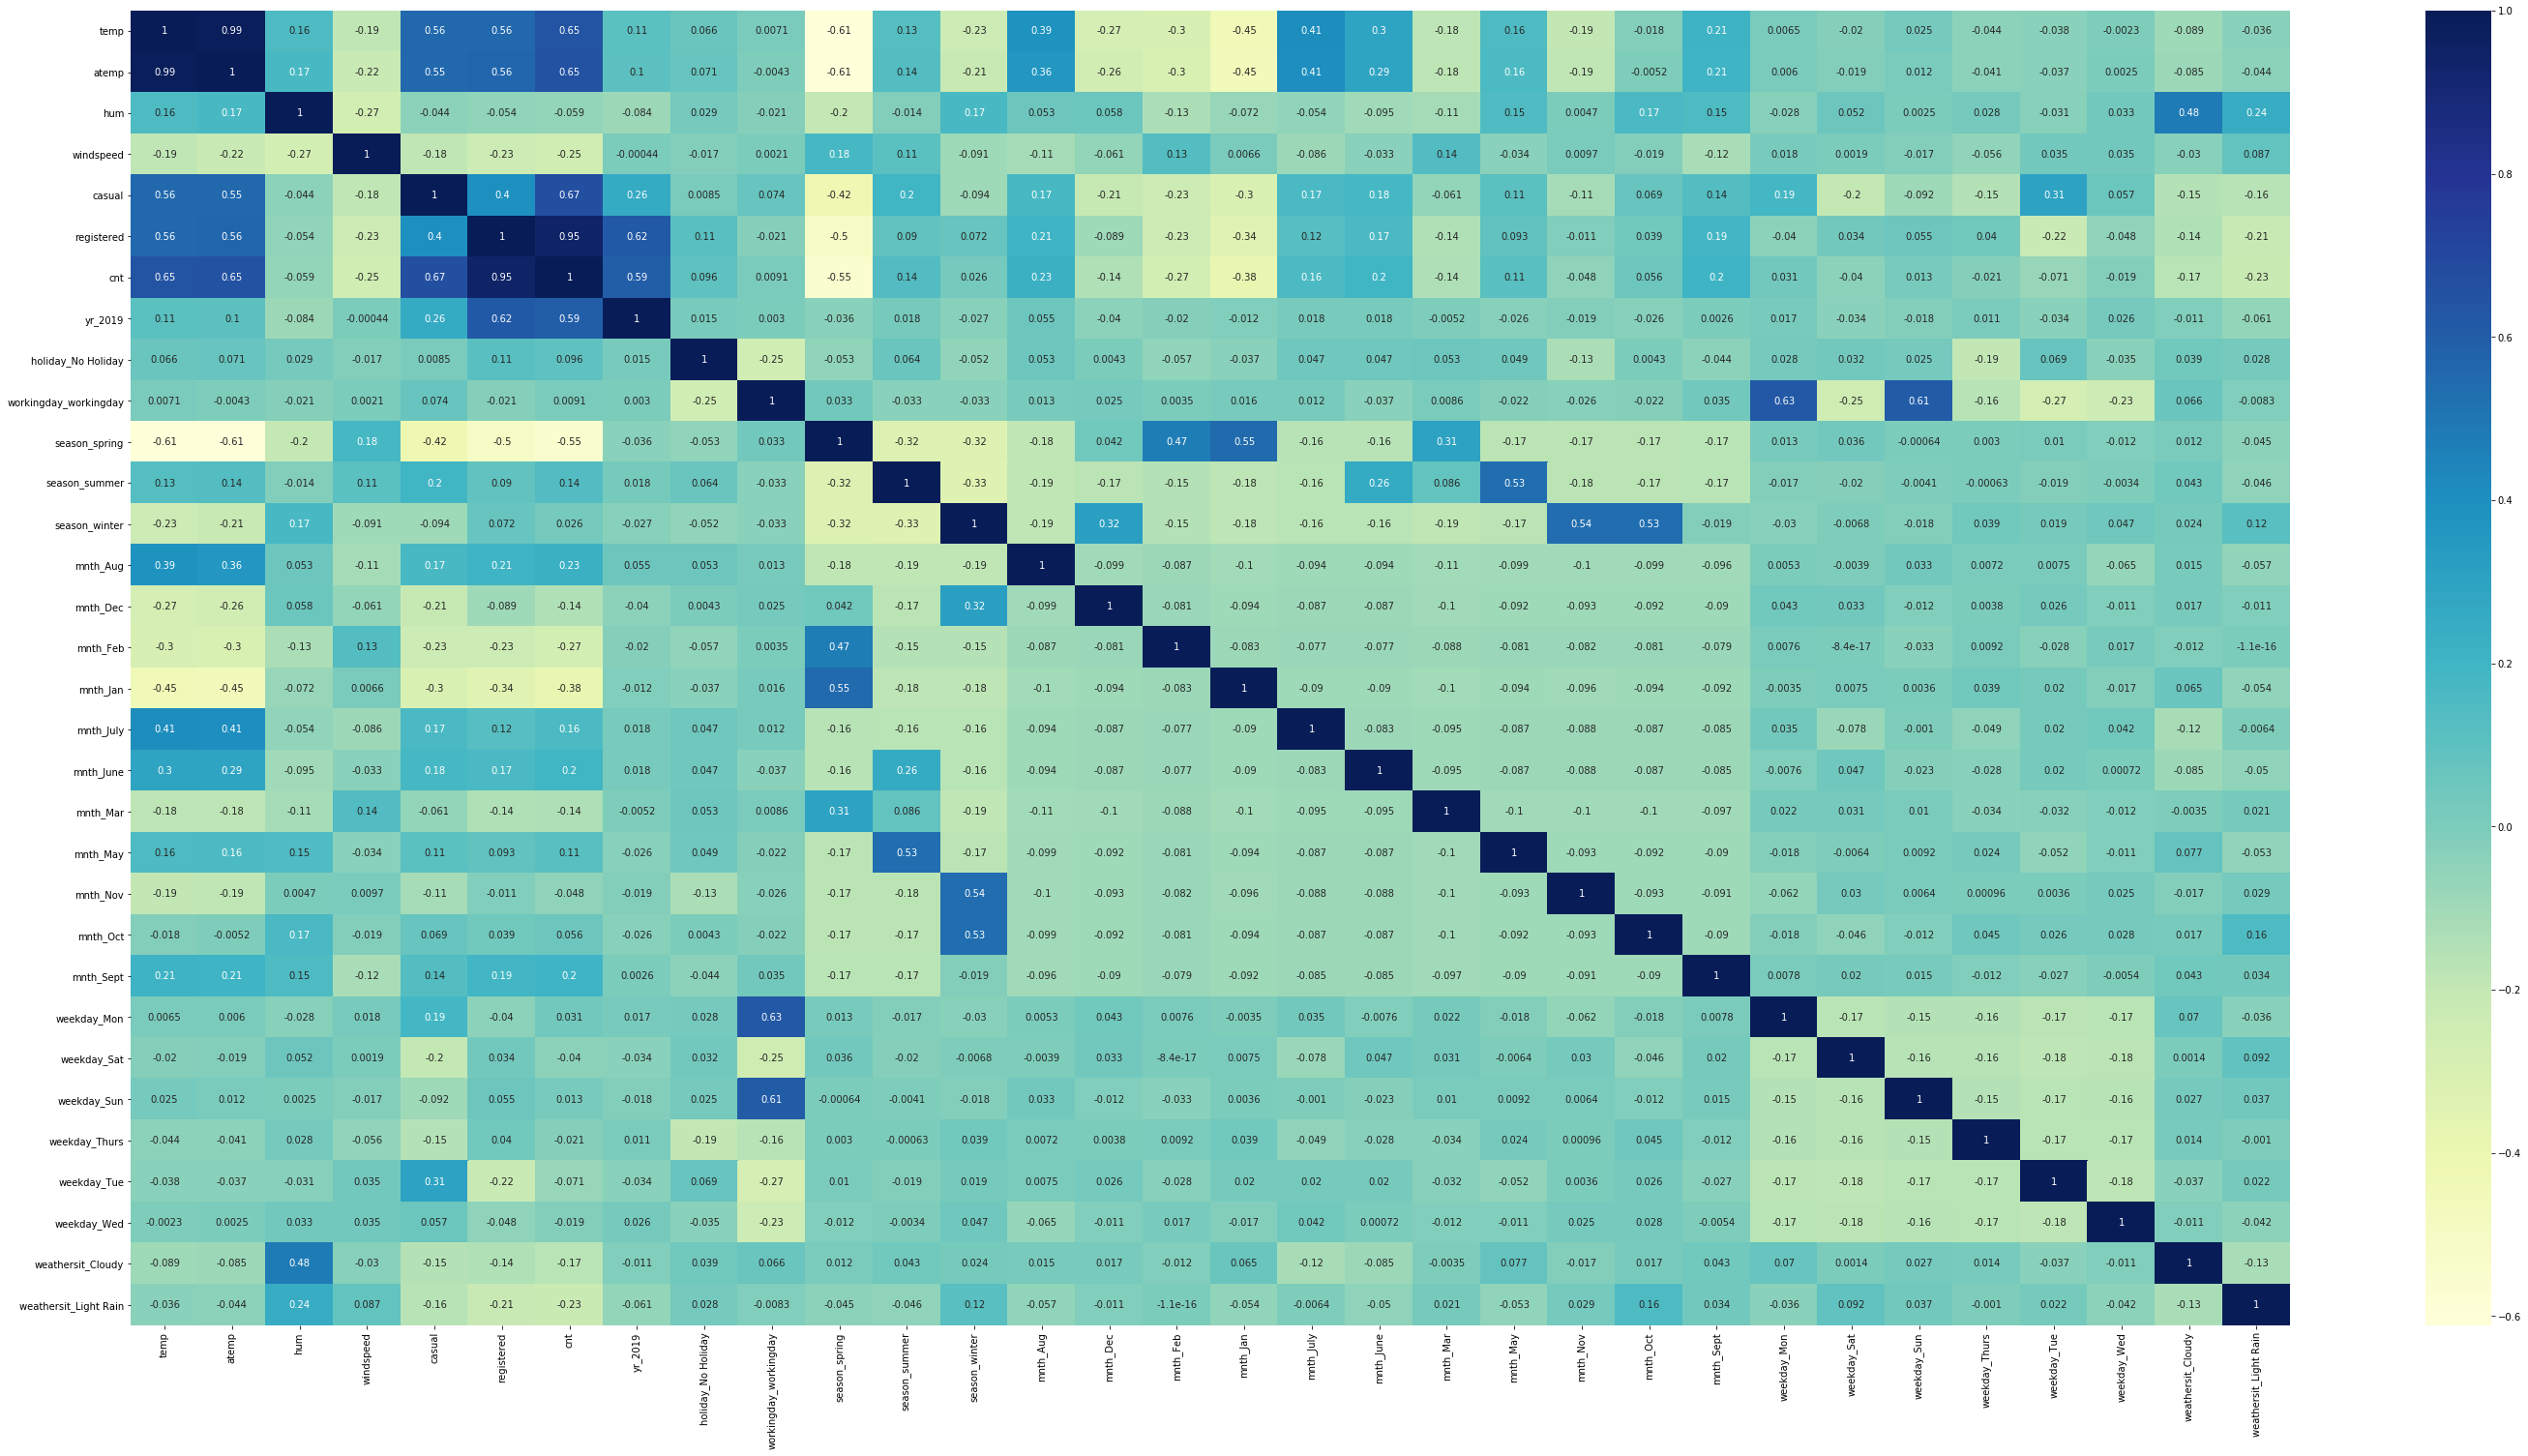

In [25]:
# Plot the co-relation graph to check the co-relation between dumy variables
plt.figure(figsize=(50,25))
sns.heatmap(df_train.corr(),annot=True,cmap='YlGnBu')
plt.show()

In [26]:
# Split df_train further into X_train and y_train
y_train=df_train.pop('cnt')
X_train=df_train

# 3. <b style='color:green;'>Trainning the Data:</b>
- Backward Selection: We would use all variables to make our first model and then using our business accumen we would drop feature by feature.

<b style='color:red;'>Backward Selection:</b>We would use all our variables and drop them one by one to prevent high VIF or reduce it in important business variables.. I personally prefer this way, because I feel i don't lose on any important variable.

In [27]:
# Creating a model with all the variables
import statsmodels.api as sm
X_train_xm = sm.add_constant(X_train)

lr_2 = sm.OLS(y_train, X_train_xm).fit()

lr_2.params
lr_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 8.308e+29
Date:                Sat, 17 Jul 2021   Prob (F-statistic):               0.00
Time:                        12:07:37   Log-Likelihood:                 16909.
No. Observations:                 510   AIC:                        -3.375e+04
Df Residuals:                     478   BIC:                        -3.362e+04
Df Model:                          31                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                  -2.22e-16   8.88e-16     -0.250      0.803   -1.97e-15    1.52e-15
temp                   -1.11e-16   1.62e-15     -0.069      0.945   -3.29e-15    3.07e-15
atemp                   2.22e-16   1.56e-15      0.142      0.887   -2.84e-15    3.28e-15
hum                   -9.021e-17   4.42e-16     -0.204      0.838   -9.59e-16    7.79e-16
windspeed             -1.735e-16   3.13e-16     -0.555      0.579   -7.88e-16    4.41e-16
casual                    0.3775   3.67e-16   1.03e+15      0.000       0.377       0.377
registered                0.7968    4.8e-16   1.66e+15      0.000       0.797       0.797
yr_2019                6.939e-17   1.54e-16      0.450      0.653   -2.33e-16    3.72e-16
holiday_No Holiday     9.437e-16   7.35e-16      1.284      0.200      -5e-16    2.39e-15
workingday_workingday  4.996e-16   7.96e-16      0.628      0.530   -1.06e-15    2.06e-15
season_spring          2.776e-17   3.39e-16      0.082      0.935   -6.38e-16    6.94e-16
season_summer          1.943e-16   2.97e-16      0.655      0.513   -3.89e-16    7.78e-16
season_winter          6.939e-17   3.22e-16      0.216      0.829   -5.63e-16    7.01e-16
mnth_Aug              -8.327e-17   3.82e-16     -0.218      0.828   -8.35e-16    6.68e-16
mnth_Dec              -1.388e-17    3.8e-16     -0.037      0.971    -7.6e-16    7.32e-16
mnth_Feb               2.845e-16   3.73e-16      0.764      0.446   -4.48e-16    1.02e-15
mnth_Jan               3.123e-17    3.8e-16      0.082      0.935   -7.15e-16    7.78e-16
mnth_July                      0   3.96e-16          0      1.000   -7.78e-16    7.78e-16
mnth_June             -2.637e-16   2.83e-16     -0.933      0.352   -8.19e-16    2.92e-16
mnth_Mar               4.857e-17   2.77e-16      0.175      0.861   -4.96e-16    5.93e-16
mnth_May               1.249e-16   2.39e-16      0.522      0.602   -3.45e-16    5.95e-16
mnth_Nov              -1.249e-16   4.11e-16     -0.304      0.761   -9.32e-16    6.82e-16
mnth_Oct              -9.714e-17   4.06e-16     -0.240      0.811   -8.94e-16       7e-16
mnth_Sept              2.845e-16   3.63e-16      0.783      0.434   -4.29e-16    9.98e-16
weekday_Mon           -2.776e-16   8.04e-16     -0.345      0.730   -1.86e-15     1.3e-15
weekday_Sat           -2.776e-17   1.68e-16     -0.166      0.869   -3.57e-16    3.02e-16
weekday_Sun           -3.331e-16   8.03e-16     -0.415      0.679   -1.91e-15    1.25e-15
weekday_Thurs          -1.18e-16   1.73e-16     -0.682      0.495   -4.58e-16    2.22e-16
weekday_Tue            2.082e-16   2.07e-16      1.005      0.315   -1.99e-16    6.15e-16
weekday_Wed            8.327e-17   1.77e-16      0.470      0.639   -2.65e-16    4.32e-16
weathersit_Cloudy      7.633e-17   1.21e-16      0.630      0.529   -1.62e-16    3.14e-16
weathersit_Light Rain -

<b style='color:red;'>Reasoning: </b>Let's make our first model with all the variables and check it's R2 and p-value score.

In [28]:
# Import the Variance Inflation library 
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [29]:
# Let's check it's ViF
vif = pd.DataFrame()
X = X_train
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,temp,453.56
1,atemp,383.72
7,holiday_No Holiday,98.45
8,workingday_workingday,43.14
2,hum,42.96
5,registered,37.77
23,weekday_Mon,24.10
25,weekday_Sun,22.15
9,season_spring,13.54
11,season_winter,12.90


<b style='color:red;'>Infrence:</b> We see co-efficinets with e^x and p-value have pretty high values too. That means we are using variables that are too much co-related and some are redundant also in presence of other variables, thus we have to delete them.
____
<b style='color:red;'>Reasoning:</b> I checked the co-relation of atemp and temp which is 0.99 which can mean that both of the variables have some what same values. Thus, I think temp is an important variable and so we can start by dropping atemp.

In [30]:
# Drop Variable temp
X=X.drop('atemp',1)

In [31]:
# Fit the model again
X_train_cm = sm.add_constant(X)

lr_5 = sm.OLS(y_train, X_train_cm).fit()

In [32]:
print(lr_5.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 3.210e+30
Date:                Sat, 17 Jul 2021   Prob (F-statistic):               0.00
Time:                        12:07:37   Log-Likelihood:                 17245.
No. Observations:                 510   AIC:                        -3.443e+04
Df Residuals:                     479   BIC:                        -3.430e+04
Df Model:                          30                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                  -2.22e-

In [33]:
vif = pd.DataFrame()
X = X
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
6,holiday_No Holiday,98.45
0,temp,54.48
7,workingday_workingday,43.11
1,hum,42.91
4,registered,37.69
22,weekday_Mon,24.08
24,weekday_Sun,22.15
8,season_spring,13.52
10,season_winter,12.89
9,season_summer,9.83


<b style='color:red;'>Infrence:</b> The VIF and p-values have dropped alot. We can now move onto next variable. 
____
<b style='color:red;'>Reasoning:</b> Holiday No_Holiday has the highest VIF with a very high P-value too. As this variable is being captured by weekends, weekdays and other variables and it's p-value suggests that it is statistically it is not useful for our model. Thus we can delete this sub-category. 

In [34]:
# Drop Holiday_No Holiday
X=X.drop('holiday_No Holiday',1)

In [35]:
# Fit the model again
X_train_cm = sm.add_constant(X)

lr_5 = sm.OLS(y_train, X_train_cm).fit()
print(lr_5.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 1.296e+30
Date:                Sat, 17 Jul 2021   Prob (F-statistic):               0.00
Time:                        12:07:38   Log-Likelihood:                 17004.
No. Observations:                 510   AIC:                        -3.395e+04
Df Residuals:                     480   BIC:                        -3.382e+04
Df Model:                          29                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                   2.22e-

In [36]:
vif = pd.DataFrame()
X = X
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,temp,51.64
1,hum,38.39
4,registered,32.93
6,workingday_workingday,15.84
9,season_winter,12.72
7,season_spring,11.98
21,weekday_Mon,9.27
23,weekday_Sun,8.88
8,season_summer,7.69
3,casual,7.39


<b style='color:red;'>Infrence:</b> The VIF has further dropped and so has other P-values have also changed. We can move to another variable.
_____
<b style='color:red;'>Reasoning:</b> Working Working day has a high VIF of 15 and it's p-value of 0.220 too and I think it is redundant because same information is being captured by Weekdays working day and a very high p-value which states that the variable is not important for our model. Thus, they are pretty co-related.

In [37]:
# Drop working day variable
X=X.drop('workingday_workingday',1)

In [38]:
# Fit the model again
X_train_cm = sm.add_constant(X)

lr_6 = sm.OLS(y_train, X_train_cm).fit()
lr_6.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 2.492e+29
Date:                Sat, 17 Jul 2021   Prob (F-statistic):               0.00
Time:                        12:07:38   Log-Likelihood:                 16574.
No. Observations:                 510   AIC:                        -3.309e+04
Df Residuals:                     481   BIC:                        -3.297e+04
Df Model:                          28                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                  1.416e-15   1.03e-15      1.374      0.170   -6.09e-16    3.44e-15
temp                  -4.441e-16   1.09e-15     -0.407      0.684   -2.59e-15     1.7e-15
hum                    6.245e-16   8.48e-16      0.736      0.462   -1.04e-15    2.29e-15
windspeed              2.741e-16   5.88e-16      0.466      0.641   -8.82e-16    1.43e-15
casual                    0.3775      7e-16   5.39e+14      0.000       0.377       0.377
registered                0.7968   8.98e-16   8.88e+14      0.000       0.797       0.797
yr_2019                4.163e-16   2.93e-16      1.423      0.155   -1.59e-16    9.91e-16
season_spring         -7.494e-16   6.51e-16     -1.152      0.250   -2.03e-15    5.29e-16
season_summer         -3.331e-16   5.69e-16     -0.585      0.559   -1.45e-15    7.85e-16
season_winter         -5.274e-16   6.17e-16     -0.855      0.393   -1.74e-15    6.85e-16
mnth_Aug              -3.886e-16   7.28e-16     -0.534      0.594   -1.82e-15    1.04e-15
mnth_Dec                 1.7e-16   7.28e-16      0.234      0.815   -1.26e-15     1.6e-15
mnth_Feb               3.469e-17   7.15e-16      0.049      0.961   -1.37e-15    1.44e-15
mnth_Jan               2.394e-16    7.3e-16      0.328      0.743   -1.19e-15    1.67e-15
mnth_July             -3.331e-16   7.58e-16     -0.440      0.660   -1.82e-15    1.16e-15
mnth_June             -4.649e-16   5.38e-16     -0.865      0.388   -1.52e-15    5.91e-16
mnth_Mar               2.082e-17   5.32e-16      0.039      0.969   -1.02e-15    1.07e-15
mnth_May              -2.637e-16   4.57e-16     -0.577      0.564   -1.16e-15    6.34e-16
mnth_Nov              -6.939e-18   7.85e-16     -0.009      0.993   -1.55e-15    1.53e-15
mnth_Oct               6.245e-17   7.79e-16      0.080      0.936   -1.47e-15    1.59e-15
mnth_Sept              -2.22e-16   6.96e-16     -0.319      0.750   -1.59e-15    1.14e-15
weekday_Mon           -2.776e-17   3.63e-16     -0.076      0.939   -7.41e-16    6.86e-16
weekday_Sat            1.804e-16   3.22e-16      0.560      0.576   -4.53e-16    8.13e-16
weekday_Sun            8.327e-17   3.32e-16      0.251      0.802   -5.68e-16    7.35e-16
weekday_Thurs          1.527e-16   3.28e-16      0.466      0.642   -4.91e-16    7.97e-16
weekday_Tue           -6.939e-17   3.94e-16     -0.176      0.860   -8.45e-16    7.06e-16
weekday_Wed             2.22e-16    3.4e-16      0.652      0.514   -4.47e-16    8.91e-16
weathersit_Cloudy      4.094e-16   2.32e-16      1.762      0.079   -4.71e-17    8.66e-16
weathersit_Light Rain  1.405e-16   6.19e-16      0.227      0.821   -1.08e-15    1.36e-15
==============================================================================
Omnibus:                        5.648   Durbin-Watson:                   0.091
Prob(Omnibus):                  0.059   Jarqu

In [39]:
vif = pd.DataFrame()
X = X
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,temp,51.00
1,hum,38.38
4,registered,31.56
8,season_winter,12.71
6,season_spring,11.98
7,season_summer,7.68
3,casual,7.30
18,mnth_Oct,6.36
9,mnth_Aug,6.14
17,mnth_Nov,6.05


<b style='color:red;'>Infrence:</b> The VIF has further dropped and so has other P-values have also changed. We can move to another variable.
___
<b style='color:red;'>Reasoning:</b> Registration has 31 VIF and p-value 0.797 which means it is being captured in other variables like casual and our target variables and p-value suggests that this variable is redundant. Thus we drop it.

In [40]:
# Having registration and casual in one go does not make sense as they are inter-related
X=X.drop('registered',1)

In [41]:
# Fit the model again
X_train_cm = sm.add_constant(X)

lr_6 = sm.OLS(y_train, X_train_cm).fit()
lr_6.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.887
Model:                            OLS   Adj. R-squared:                  0.881
Method:                 Least Squares   F-statistic:                     140.2
Date:                Sat, 17 Jul 2021   Prob (F-statistic):          5.86e-209
Time:                        12:07:38   Log-Likelihood:                 595.06
No. Observations:                 510   AIC:                            -1134.
Df Residuals:                     482   BIC:                            -1016.
Df Model:                          27                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.3359      0.039      8.669      0.000       0.260       0.412
temp                      0.2619      0.042      6.164      0.000       0.178       0.345
hum                      -0.1109      0.034     -3.272      0.001      -0.178      -0.044
windspeed                -0.1146      0.023     -4.938      0.000      -0.160      -0.069
casual                    0.3714      0.028     13.115      0.000       0.316       0.427
yr_2019                   0.2026      0.007     27.387      0.000       0.188       0.217
season_spring            -0.0442      0.026     -1.683      0.093      -0.096       0.007
season_summer             0.0128      0.023      0.557      0.578      -0.032       0.058
season_winter             0.1141      0.024      4.677      0.000       0.066       0.162
mnth_Aug                  0.0344      0.029      1.172      0.242      -0.023       0.092
mnth_Dec                 -0.0299      0.029     -1.016      0.310      -0.088       0.028
mnth_Feb                 -0.0261      0.029     -0.903      0.367      -0.083       0.031
mnth_Jan                 -0.0500      0.029     -1.699      0.090      -0.108       0.008
mnth_July                -0.0038      0.031     -0.123      0.902      -0.064       0.056
mnth_June                 0.0300      0.022      1.381      0.168      -0.013       0.073
mnth_Mar                 -0.0032      0.022     -0.150      0.881      -0.045       0.039
mnth_May                  0.0349      0.018      1.898      0.058      -0.001       0.071
mnth_Nov                 -0.0579      0.032     -1.830      0.068      -0.120       0.004
mnth_Oct                 -0.0292      0.031     -0.930      0.353      -0.091       0.033
mnth_Sept                 0.0709      0.028      2.538      0.011       0.016       0.126
weekday_Mon              -0.0711      0.014     -4.970      0.000      -0.099      -0.043
weekday_Sat              -0.0143      0.013     -1.096      0.273      -0.040       0.011
weekday_Sun              -0.0208      0.013     -1.553      0.121      -0.047       0.006
weekday_Thurs            -0.0326      0.013     -2.473      0.014      -0.058      -0.007
weekday_Tue              -0.1276      0.015     -8.594      0.000      -0.157      -0.098
weekday_Wed              -0.0807      0.013     -6.090      0.000      -0.107      -0.055
weathersit_Cloudy        -0.0383      0.009     -4.153      0.000      -0.056      -0.020
weathersit_Light Rain    -0.1893      0.024     -8.051      0.000      -0.235      -0.143
==============================================================================
Omnibus:                      132.493   Durbin-Watson:                   1.867
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              419.248
Skew:                          -1.204   Prob(JB):       

In [42]:
vif = pd.DataFrame()
X = X
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,temp,41.52
1,hum,38.37
5,season_spring,11.90
7,season_winter,11.62
3,casual,7.30
6,season_summer,7.01
17,mnth_Oct,6.32
16,mnth_Nov,6.00
8,mnth_Aug,5.86
2,windspeed,5.44


<b style='color:red;'>Infrence:</b> Now we see the co-efficients in normal acceptable limits for further infrences. Vif have also dropped and so have the p-values have changed. 
_____
<b style='color:red;'>Reasoning:</b> Humidity and temprature are inversely co-related in terms of scientific formulas, thus pretty high-corelation. What data humidity is capturing is being captured by temprature too. This variable has 0.001 which is low but a very high VIF.

In [43]:
# Temprature and Humidity are inversely co-related thus we would have to drop one of them. We would go with humidity
X=X.drop('hum',1)

In [44]:
# Fit the model again
X_train_cm = sm.add_constant(X)

lr_7 = sm.OLS(y_train, X_train_cm).fit()
lr_7.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.885
Model:                            OLS   Adj. R-squared:                  0.878
Method:                 Least Squares   F-statistic:                     142.4
Date:                Sat, 17 Jul 2021   Prob (F-statistic):          9.33e-208
Time:                        12:07:38   Log-Likelihood:                 589.46
No. Observations:                 510   AIC:                            -1125.
Df Residuals:                     483   BIC:                            -1011.
Df Model:                          26                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.2928      0.037      7.956      0.000       0.220       0.365
temp                      0.2218      0.041      5.397      0.000       0.141       0.303
windspeed                -0.0928      0.022     -4.134      0.000      -0.137      -0.049
casual                    0.3805      0.028     13.370      0.000       0.325       0.436
yr_2019                   0.2046      0.007     27.465      0.000       0.190       0.219
season_spring            -0.0473      0.026     -1.786      0.075      -0.099       0.005
season_summer             0.0056      0.023      0.240      0.810      -0.040       0.051
season_winter             0.1113      0.025      4.519      0.000       0.063       0.160
mnth_Aug                  0.0323      0.030      1.087      0.277      -0.026       0.091
mnth_Dec                 -0.0452      0.029     -1.542      0.124      -0.103       0.012
mnth_Feb                 -0.0353      0.029     -1.214      0.225      -0.092       0.022
mnth_Jan                 -0.0631      0.029     -2.145      0.032      -0.121      -0.005
mnth_July                -0.0006      0.031     -0.018      0.985      -0.061       0.060
mnth_June                 0.0360      0.022      1.648      0.100      -0.007       0.079
mnth_Mar                 -0.0089      0.022     -0.412      0.680      -0.051       0.034
mnth_May                  0.0301      0.019      1.626      0.105      -0.006       0.066
mnth_Nov                 -0.0699      0.032     -2.204      0.028      -0.132      -0.008
mnth_Oct                 -0.0425      0.031     -1.350      0.178      -0.104       0.019
mnth_Sept                 0.0621      0.028      2.212      0.027       0.007       0.117
weekday_Mon              -0.0720      0.014     -4.980      0.000      -0.100      -0.044
weekday_Sat              -0.0159      0.013     -1.212      0.226      -0.042       0.010
weekday_Sun              -0.0204      0.014     -1.508      0.132      -0.047       0.006
weekday_Thurs            -0.0337      0.013     -2.539      0.011      -0.060      -0.008
weekday_Tue              -0.1310      0.015     -8.752      0.000      -0.160      -0.102
weekday_Wed              -0.0849      0.013     -6.371      0.000      -0.111      -0.059
weathersit_Cloudy        -0.0549      0.008     -7.045      0.000      -0.070      -0.040
weathersit_Light Rain    -0.2176      0.022     -9.857      0.000      -0.261      -0.174
==============================================================================
Omnibus:                      129.011   Durbin-Watson:                   1.882
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              401.157
Skew:                          -1.178   Prob(JB):                     7.76e-88
Kurtosis:                       6.650   Cond. No.                  

In [45]:
vif = pd.DataFrame()
X = X
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,temp,30.02
4,season_spring,11.41
6,season_winter,11.40
2,casual,7.22
5,season_summer,5.86
16,mnth_Oct,5.85
7,mnth_Aug,5.65
15,mnth_Nov,5.44
1,windspeed,5.22
11,mnth_July,5.19


<b style='color:red;'>Infrence:</b> R2 is 0.885 which is pretty good, but the VIF is in un-reasonable range. Thus now we have to lower the VIF and p-values now that R2 is in acceptable range.
___
<b style='color:red;'>Reasoning:</b> Next big VIF is of season spring and it's p-value is 0.075. I think the year 2018 and 2019 are capturing the data that is being presented by season spring. Season spring has a very high co-relation with temp.

In [46]:
# Spring and winter have a co-relation of -0.32 thus we can drop one of them too. Because we have summer, we need to have winter. Thus we can drop spring
X=X.drop('season_spring',1)

In [47]:
# Fit the model again
X_train_cm = sm.add_constant(X)

lr_8 = sm.OLS(y_train, X_train_cm).fit()
lr_8.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.884
Model:                            OLS   Adj. R-squared:                  0.878
Method:                 Least Squares   F-statistic:                     147.3
Date:                Sat, 17 Jul 2021   Prob (F-statistic):          3.69e-208
Time:                        12:07:38   Log-Likelihood:                 587.78
No. Observations:                 510   AIC:                            -1124.
Df Residuals:                     484   BIC:                            -1013.
Df Model:                          25                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.2637      0.033      7.972      0.000       0.199       0.329
temp                      0.2303      0.041      5.629      0.000       0.150       0.311
windspeed                -0.0957      0.022     -4.263      0.000      -0.140      -0.052
casual                    0.3803      0.029     13.332      0.000       0.324       0.436
yr_2019                   0.2043      0.007     27.372      0.000       0.190       0.219
season_summer             0.0324      0.018      1.839      0.067      -0.002       0.067
season_winter             0.1377      0.020      6.977      0.000       0.099       0.176
mnth_Aug                  0.0561      0.027      2.111      0.035       0.004       0.108
mnth_Dec                 -0.0502      0.029     -1.715      0.087      -0.108       0.007
mnth_Feb                 -0.0542      0.027     -1.998      0.046      -0.107      -0.001
mnth_Jan                 -0.0814      0.028     -2.948      0.003      -0.136      -0.027
mnth_July                 0.0228      0.028      0.810      0.418      -0.032       0.078
mnth_June                 0.0430      0.022      1.997      0.046       0.001       0.085
mnth_Mar                 -0.0215      0.021     -1.050      0.294      -0.062       0.019
mnth_May                  0.0284      0.019      1.529      0.127      -0.008       0.065
mnth_Nov                 -0.0689      0.032     -2.170      0.031      -0.131      -0.007
mnth_Oct                 -0.0429      0.032     -1.358      0.175      -0.105       0.019
mnth_Sept                 0.0809      0.026      3.098      0.002       0.030       0.132
weekday_Mon              -0.0722      0.014     -4.980      0.000      -0.101      -0.044
weekday_Sat              -0.0163      0.013     -1.242      0.215      -0.042       0.010
weekday_Sun              -0.0215      0.014     -1.587      0.113      -0.048       0.005
weekday_Thurs            -0.0342      0.013     -2.570      0.010      -0.060      -0.008
weekday_Tue              -0.1323      0.015     -8.832      0.000      -0.162      -0.103
weekday_Wed              -0.0857      0.013     -6.416      0.000      -0.112      -0.059
weathersit_Cloudy        -0.0548      0.008     -7.012      0.000      -0.070      -0.039
weathersit_Light Rain    -0.2154      0.022     -9.751      0.000      -0.259      -0.172
==============================================================================
Omnibus:                      125.228   Durbin-Watson:                   1.896
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              381.979
Skew:                          -1.150   Prob(JB):                     1.13e-83
Kurtosis:                       6.561   Cond. No.                         31.9
==============================================================================

In [48]:
vif = pd.DataFrame()
X = X
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,temp,28.61
5,season_winter,7.96
2,casual,7.22
15,mnth_Oct,5.56
6,mnth_Aug,5.09
14,mnth_Nov,5.07
1,windspeed,5.00
10,mnth_July,4.71
4,season_summer,4.21
16,mnth_Sept,3.75


<b style='color:red;'>Infrence:</b> R2 is does not change much, but VIF and p-value does drop alot. 
_____
<b style='color:red;'>Reasoning:</b> Casual does not have a high VIF as compared to other variables but it's data is being captured by other variables like days and months. It's p-value is also in our acceptable range 0.000

In [49]:
# Temprature and Casual have a high co-relation of 0.56 thus we would need to remove casual
X=X.drop('casual',1)

In [50]:
# Fit the model again
X_train_cm = sm.add_constant(X)

lr_9 = sm.OLS(y_train, X_train_cm).fit()
lr_9.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.841
Model:                            OLS   Adj. R-squared:                  0.833
Method:                 Least Squares   F-statistic:                     107.0
Date:                Sat, 17 Jul 2021   Prob (F-statistic):          1.50e-176
Time:                        12:07:38   Log-Likelihood:                 508.02
No. Observations:                 510   AIC:                            -966.0
Df Residuals:                     485   BIC:                            -860.2
Df Model:                          24                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.2505      0.039      6.485      0.000       0.175       0.326
temp                      0.3894      0.046      8.518      0.000       0.300       0.479
windspeed                -0.1585      0.026     -6.185      0.000      -0.209      -0.108
yr_2019                   0.2357      0.008     28.478      0.000       0.219       0.252
season_summer             0.0621      0.020      3.040      0.002       0.022       0.102
season_winter             0.1390      0.023      6.028      0.000       0.094       0.184
mnth_Aug                  0.0500      0.031      1.611      0.108      -0.011       0.111
mnth_Dec                 -0.0771      0.034     -2.262      0.024      -0.144      -0.010
mnth_Feb                 -0.0734      0.032     -2.322      0.021      -0.136      -0.011
mnth_Jan                 -0.1050      0.032     -3.261      0.001      -0.168      -0.042
mnth_July                 0.0013      0.033      0.041      0.967      -0.063       0.066
mnth_June                 0.0267      0.025      1.064      0.288      -0.023       0.076
mnth_Mar                 -0.0184      0.024     -0.768      0.443      -0.065       0.029
mnth_May                  0.0189      0.022      0.875      0.382      -0.024       0.061
mnth_Nov                 -0.0701      0.037     -1.889      0.059      -0.143       0.003
mnth_Oct                 -0.0183      0.037     -0.496      0.620      -0.091       0.054
mnth_Sept                 0.0941      0.030      3.089      0.002       0.034       0.154
weekday_Mon               0.0051      0.016      0.330      0.742      -0.025       0.036
weekday_Sat              -0.0075      0.015     -0.491      0.624      -0.038       0.023
weekday_Sun              -0.0019      0.016     -0.119      0.906      -0.033       0.029
weekday_Thurs            -0.0240      0.016     -1.543      0.124      -0.054       0.007
weekday_Tue              -0.0315      0.015     -2.088      0.037      -0.061      -0.002
weekday_Wed              -0.0381      0.015     -2.536      0.012      -0.068      -0.009
weathersit_Cloudy        -0.0804      0.009     -9.091      0.000      -0.098      -0.063
weathersit_Light Rain    -0.2867      0.025    -11.450      0.000      -0.336      -0.238
==============================================================================
Omnibus:                       87.613   Durbin-Watson:                   1.971
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              237.799
Skew:                          -0.842   Prob(JB):                     2.30e-52
Kurtosis:                       5.891   Cond. No.                         31.4
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correct

In [51]:
vif = pd.DataFrame()
X = X
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,temp,25.10
4,season_winter,7.96
14,mnth_Oct,5.55
5,mnth_Aug,5.09
13,mnth_Nov,5.07
1,windspeed,4.74
9,mnth_July,4.69
3,season_summer,4.13
15,mnth_Sept,3.75
6,mnth_Dec,3.40


<b style='color:red;'>Infrence:</b> R2 is does not change much, but VIF and p-value does drop alot. 
__________

<b style='color:red;'>Reasoning:</b> July month does not have a high VIF as compared to other variables and it's p-value is 0.967 but it's data is being captured by other variables like days and months. It's high value is also states that it is statistically redundant.

In [52]:
# Month july has p-value of 0.967
X=X.drop('mnth_July',1)

In [53]:
# Fit the model again
X_train_cm = sm.add_constant(X)

lr_10 = sm.OLS(y_train, X_train_cm).fit()
lr_10.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.841
Model:                            OLS   Adj. R-squared:                  0.834
Method:                 Least Squares   F-statistic:                     111.9
Date:                Sat, 17 Jul 2021   Prob (F-statistic):          1.40e-177
Time:                        12:07:38   Log-Likelihood:                 508.02
No. Observations:                 510   AIC:                            -968.0
Df Residuals:                     486   BIC:                            -866.4
Df Model:                          23                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.2509      0.037      6.703      0.000       0.177       0.324
temp                      0.3902      0.041      9.566      0.000       0.310       0.470
windspeed                -0.1586      0.025     -6.231      0.000      -0.209      -0.109
yr_2019                   0.2356      0.008     28.606      0.000       0.219       0.252
season_summer             0.0616      0.017      3.704      0.000       0.029       0.094
season_winter             0.1390      0.023      6.034      0.000       0.094       0.184
mnth_Aug                  0.0490      0.018      2.658      0.008       0.013       0.085
mnth_Dec                 -0.0777      0.030     -2.553      0.011      -0.138      -0.018
mnth_Feb                 -0.0740      0.028     -2.613      0.009      -0.130      -0.018
mnth_Jan                 -0.1056      0.030     -3.570      0.000      -0.164      -0.047
mnth_June                 0.0260      0.019      1.383      0.167      -0.011       0.063
mnth_Mar                 -0.0189      0.020     -0.922      0.357      -0.059       0.021
mnth_May                  0.0185      0.019      0.965      0.335      -0.019       0.056
mnth_Nov                 -0.0708      0.033     -2.125      0.034      -0.136      -0.005
mnth_Oct                 -0.0190      0.031     -0.607      0.544      -0.081       0.043
mnth_Sept                 0.0932      0.020      4.609      0.000       0.053       0.133
weekday_Mon               0.0051      0.015      0.331      0.741      -0.025       0.036
weekday_Sat              -0.0076      0.015     -0.494      0.622      -0.038       0.023
weekday_Sun              -0.0019      0.016     -0.119      0.905      -0.033       0.029
weekday_Thurs            -0.0240      0.016     -1.544      0.123      -0.054       0.007
weekday_Tue              -0.0315      0.015     -2.090      0.037      -0.061      -0.002
weekday_Wed              -0.0381      0.015     -2.539      0.011      -0.068      -0.009
weathersit_Cloudy        -0.0804      0.009     -9.103      0.000      -0.098      -0.063
weathersit_Light Rain    -0.2867      0.025    -11.469      0.000      -0.336      -0.238
==============================================================================
Omnibus:                       87.468   Durbin-Watson:                   1.971
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              237.122
Skew:                          -0.841   Prob(JB):                     3.23e-52
Kurtosis:                       5.886   Cond. No.                         27.4
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [54]:
vif = pd.DataFrame()
X = X
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,temp,8.23
4,season_winter,7.96
1,windspeed,4.73
12,mnth_Nov,4.35
13,mnth_Oct,4.30
6,mnth_Dec,2.88
3,season_summer,2.86
2,yr_2019,2.10
16,weekday_Sat,2.01
20,weekday_Wed,2.00


<b style='color:red;'>Infrence:</b> R2 did not change at all, but the VIF value did decrease.  
__________

<b style='color:red;'>Reasoning:</b> October month's has a VIF under 5 and it's p-value 0.544, but i feel that against this data is being captured by variables like Year 2019, Weekdays, Summers or winters and thus we do not need it. 

In [55]:
# Month October has a high p-value of 0.544
X=X.drop('mnth_Oct',1)

In [56]:
# Fit the model again
X_train_cm = sm.add_constant(X)

lr_11 = sm.OLS(y_train, X_train_cm).fit()
lr_11.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.841
Model:                            OLS   Adj. R-squared:                  0.834
Method:                 Least Squares   F-statistic:                     117.1
Date:                Sat, 17 Jul 2021   Prob (F-statistic):          1.54e-178
Time:                        12:07:38   Log-Likelihood:                 507.82
No. Observations:                 510   AIC:                            -969.6
Df Residuals:                     487   BIC:                            -872.3
Df Model:                          22                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.2421      0.034      7.020      0.000       0.174       0.310
temp                      0.3977      0.039     10.240      0.000       0.321       0.474
windspeed                -0.1592      0.025     -6.260      0.000      -0.209      -0.109
yr_2019                   0.2357      0.008     28.639      0.000       0.220       0.252
season_summer             0.0652      0.015      4.207      0.000       0.035       0.096
season_winter             0.1288      0.016      8.114      0.000       0.098       0.160
mnth_Aug                  0.0519      0.018      2.920      0.004       0.017       0.087
mnth_Dec                 -0.0642      0.021     -3.104      0.002      -0.105      -0.024
mnth_Feb                 -0.0671      0.026     -2.589      0.010      -0.118      -0.016
mnth_Jan                 -0.0981      0.027     -3.648      0.000      -0.151      -0.045
mnth_June                 0.0268      0.019      1.430      0.153      -0.010       0.064
mnth_Mar                 -0.0142      0.019     -0.750      0.454      -0.052       0.023
mnth_May                  0.0190      0.019      0.992      0.322      -0.019       0.057
mnth_Nov                 -0.0546      0.020     -2.740      0.006      -0.094      -0.015
mnth_Sept                 0.0992      0.018      5.633      0.000       0.065       0.134
weekday_Mon               0.0053      0.015      0.340      0.734      -0.025       0.036
weekday_Sat              -0.0077      0.015     -0.503      0.615      -0.038       0.022
weekday_Sun              -0.0020      0.016     -0.125      0.900      -0.033       0.029
weekday_Thurs            -0.0241      0.016     -1.553      0.121      -0.055       0.006
weekday_Tue              -0.0315      0.015     -2.088      0.037      -0.061      -0.002
weekday_Wed              -0.0379      0.015     -2.528      0.012      -0.067      -0.008
weathersit_Cloudy        -0.0806      0.009     -9.139      0.000      -0.098      -0.063
weathersit_Light Rain    -0.2877      0.025    -11.544      0.000      -0.337      -0.239
==============================================================================
Omnibus:                       88.530   Durbin-Watson:                   1.972
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              240.355
Skew:                          -0.850   Prob(JB):                     6.42e-53
Kurtosis:                       5.902   Cond. No.                         22.7
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [57]:
vif = pd.DataFrame()
X = X
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,temp,8.18
1,windspeed,4.59
4,season_winter,2.85
3,season_summer,2.76
2,yr_2019,2.10
19,weekday_Wed,1.99
15,weekday_Sat,1.99
18,weekday_Tue,1.96
14,weekday_Mon,1.90
11,mnth_May,1.88


<b style='color:red;'>Infrence:</b> We were right. The R2 did not change but VIF values of alot of variables dropped tremendously. 
__________

<b style='color:red;'>Reasoning:</b> Again Weekday Sunday has 1.84 VIF and it's p-value of 0.990 but it is a sub caterogry in yr 2019, summers and winters and thus can be dropped. That is it is mapping the same data that other variables are mapping. 

In [58]:
# Both monday and sunday have high p-values but I feel sunday is more redundant as a variable than Monday
X=X.drop('weekday_Sun',1)

In [59]:
# Fit the model again
X_train_cm = sm.add_constant(X)

lr_12 = sm.OLS(y_train, X_train_cm).fit()
lr_12.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.841
Model:                            OLS   Adj. R-squared:                  0.834
Method:                 Least Squares   F-statistic:                     122.9
Date:                Sat, 17 Jul 2021   Prob (F-statistic):          1.38e-179
Time:                        12:07:38   Log-Likelihood:                 507.82
No. Observations:                 510   AIC:                            -971.6
Df Residuals:                     488   BIC:                            -878.5
Df Model:                          21                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.2411      0.034      7.191      0.000       0.175       0.307
temp                      0.3978      0.039     10.255      0.000       0.322       0.474
windspeed                -0.1592      0.025     -6.268      0.000      -0.209      -0.109
yr_2019                   0.2357      0.008     28.679      0.000       0.220       0.252
season_summer             0.0653      0.015      4.217      0.000       0.035       0.096
season_winter             0.1289      0.016      8.127      0.000       0.098       0.160
mnth_Aug                  0.0519      0.018      2.921      0.004       0.017       0.087
mnth_Dec                 -0.0642      0.021     -3.112      0.002      -0.105      -0.024
mnth_Feb                 -0.0670      0.026     -2.589      0.010      -0.118      -0.016
mnth_Jan                 -0.0981      0.027     -3.652      0.000      -0.151      -0.045
mnth_June                 0.0268      0.019      1.429      0.154      -0.010       0.064
mnth_Mar                 -0.0142      0.019     -0.750      0.454      -0.052       0.023
mnth_May                  0.0190      0.019      0.993      0.321      -0.019       0.057
mnth_Nov                 -0.0546      0.020     -2.744      0.006      -0.094      -0.016
mnth_Sept                 0.0992      0.018      5.638      0.000       0.065       0.134
weekday_Mon               0.0062      0.013      0.460      0.646      -0.020       0.033
weekday_Sat              -0.0067      0.013     -0.509      0.611      -0.033       0.019
weekday_Thurs            -0.0231      0.014     -1.708      0.088      -0.050       0.003
weekday_Tue              -0.0305      0.013     -2.345      0.019      -0.056      -0.005
weekday_Wed              -0.0370      0.013     -2.843      0.005      -0.063      -0.011
weathersit_Cloudy        -0.0806      0.009     -9.177      0.000      -0.098      -0.063
weathersit_Light Rain    -0.2879      0.025    -11.602      0.000      -0.337      -0.239
==============================================================================
Omnibus:                       88.736   Durbin-Watson:                   1.972
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              240.757
Skew:                          -0.852   Prob(JB):                     5.25e-53
Kurtosis:                       5.902   Cond. No.                         22.5
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [60]:
vif = pd.DataFrame()
X = X
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,temp,7.15
1,windspeed,4.55
4,season_winter,2.81
3,season_summer,2.73
2,yr_2019,2.09
11,mnth_May,1.88
5,mnth_Aug,1.83
12,mnth_Nov,1.81
9,mnth_June,1.62
19,weathersit_Cloudy,1.61


<b style='color:red;'>Infrence:</b> We were right. The R2 did not change but VIF values of alot of variables dropped tremendously. 
__________

<b style='color:red;'>Reasoning:</b> Weekday Sat has a VIF of 1.55 and it's p-value of 0.611 thus it is again mapping thedata which other variables are also mapping. Thus it can be dropped too. 

In [61]:
X=X.drop('weekday_Sat',1)

In [62]:
# Fit the model again
X_train_cm = sm.add_constant(X)

lr_13 = sm.OLS(y_train, X_train_cm).fit()
lr_13.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.841
Model:                            OLS   Adj. R-squared:                  0.834
Method:                 Least Squares   F-statistic:                     129.2
Date:                Sat, 17 Jul 2021   Prob (F-statistic):          1.36e-180
Time:                        12:07:38   Log-Likelihood:                 507.68
No. Observations:                 510   AIC:                            -973.4
Df Residuals:                     489   BIC:                            -884.4
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.2388      0.033      7.193      0.000       0.174       0.304
temp                      0.3982      0.039     10.276      0.000       0.322       0.474
windspeed                -0.1594      0.025     -6.280      0.000      -0.209      -0.110
yr_2019                   0.2358      0.008     28.715      0.000       0.220       0.252
season_summer             0.0655      0.015      4.237      0.000       0.035       0.096
season_winter             0.1290      0.016      8.141      0.000       0.098       0.160
mnth_Aug                  0.0517      0.018      2.913      0.004       0.017       0.087
mnth_Dec                 -0.0649      0.021     -3.149      0.002      -0.105      -0.024
mnth_Feb                 -0.0670      0.026     -2.594      0.010      -0.118      -0.016
mnth_Jan                 -0.0984      0.027     -3.664      0.000      -0.151      -0.046
mnth_June                 0.0259      0.019      1.391      0.165      -0.011       0.063
mnth_Mar                 -0.0145      0.019     -0.764      0.445      -0.052       0.023
mnth_May                  0.0188      0.019      0.981      0.327      -0.019       0.056
mnth_Nov                 -0.0550      0.020     -2.766      0.006      -0.094      -0.016
mnth_Sept                 0.0989      0.018      5.628      0.000       0.064       0.133
weekday_Mon               0.0086      0.013      0.676      0.499      -0.016       0.033
weekday_Thurs            -0.0208      0.013     -1.633      0.103      -0.046       0.004
weekday_Tue              -0.0281      0.012     -2.318      0.021      -0.052      -0.004
weekday_Wed              -0.0347      0.012     -2.847      0.005      -0.059      -0.011
weathersit_Cloudy        -0.0808      0.009     -9.201      0.000      -0.098      -0.064
weathersit_Light Rain    -0.2891      0.025    -11.701      0.000      -0.338      -0.241
==============================================================================
Omnibus:                       89.052   Durbin-Watson:                   1.974
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              244.003
Skew:                          -0.852   Prob(JB):                     1.04e-53
Kurtosis:                       5.929   Cond. No.                         22.4
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [63]:
vif = pd.DataFrame()
X = X
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,temp,6.84
1,windspeed,4.54
4,season_winter,2.80
3,season_summer,2.73
2,yr_2019,2.09
11,mnth_May,1.88
5,mnth_Aug,1.82
12,mnth_Nov,1.80
18,weathersit_Cloudy,1.61
9,mnth_June,1.61


<b style='color:red;'>Infrence:</b> We were right. The R2 did not change but VIF values of alot of variables dropped tremendously. 
__________

<b style='color:red;'>Reasoning:</b> Weekday Mon has a VIF of 1.33 and it's p-value 0.499 thus it is again mapping the data which other variables are also mapping like yr 2019, summer and winter. Thus it can be dropped too. 

In [64]:
X=X.drop('weekday_Mon',1)
# Fit the model again
X_train_cm = sm.add_constant(X)

lr_13 = sm.OLS(y_train, X_train_cm).fit()
lr_13.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.841
Model:                            OLS   Adj. R-squared:                  0.835
Method:                 Least Squares   F-statistic:                     136.2
Date:                Sat, 17 Jul 2021   Prob (F-statistic):          1.44e-181
Time:                        12:07:38   Log-Likelihood:                 507.44
No. Observations:                 510   AIC:                            -974.9
Df Residuals:                     490   BIC:                            -890.2
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.2410      0.033      7.298      0.000       0.176       0.306
temp                      0.3980      0.039     10.277      0.000       0.322       0.474
windspeed                -0.1589      0.025     -6.266      0.000      -0.209      -0.109
yr_2019                   0.2359      0.008     28.748      0.000       0.220       0.252
season_summer             0.0652      0.015      4.223      0.000       0.035       0.096
season_winter             0.1289      0.016      8.142      0.000       0.098       0.160
mnth_Aug                  0.0513      0.018      2.898      0.004       0.017       0.086
mnth_Dec                 -0.0647      0.021     -3.142      0.002      -0.105      -0.024
mnth_Feb                 -0.0673      0.026     -2.607      0.009      -0.118      -0.017
mnth_Jan                 -0.0987      0.027     -3.679      0.000      -0.151      -0.046
mnth_June                 0.0258      0.019      1.385      0.167      -0.011       0.062
mnth_Mar                 -0.0147      0.019     -0.777      0.438      -0.052       0.023
mnth_May                  0.0184      0.019      0.965      0.335      -0.019       0.056
mnth_Nov                 -0.0558      0.020     -2.810      0.005      -0.095      -0.017
mnth_Sept                 0.0986      0.018      5.618      0.000       0.064       0.133
weekday_Thurs            -0.0229      0.012     -1.857      0.064      -0.047       0.001
weekday_Tue              -0.0303      0.012     -2.583      0.010      -0.053      -0.007
weekday_Wed              -0.0368      0.012     -3.131      0.002      -0.060      -0.014
weathersit_Cloudy        -0.0804      0.009     -9.181      0.000      -0.098      -0.063
weathersit_Light Rain    -0.2897      0.025    -11.744      0.000      -0.338      -0.241
==============================================================================
Omnibus:                       87.256   Durbin-Watson:                   1.971
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              240.964
Skew:                          -0.833   Prob(JB):                     4.74e-53
Kurtosis:                       5.927   Cond. No.                         22.3
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [65]:
vif = pd.DataFrame()
X = X
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,temp,6.65
1,windspeed,4.51
4,season_winter,2.79
3,season_summer,2.73
2,yr_2019,2.09
11,mnth_May,1.88
5,mnth_Aug,1.82
12,mnth_Nov,1.80
9,mnth_June,1.61
17,weathersit_Cloudy,1.60


<b style='color:red;'>Infrence:</b> We were right. The R2 did not change but VIF values changed slightly.
______
<b style='color:red;'>Reasoning:</b> March Month has a VIF of 1.36 and p-value of 0.438 and thus it is again mapping the data which other variables are also mapping. Thus it can be dropped too. 

In [66]:
# We can drop Spring months which are march and may
X=X.drop('mnth_Mar',1)
# Fit the model again
X_train_cm = sm.add_constant(X)

lr_13 = sm.OLS(y_train, X_train_cm).fit()
lr_13.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.841
Model:                            OLS   Adj. R-squared:                  0.835
Method:                 Least Squares   F-statistic:                     143.8
Date:                Sat, 17 Jul 2021   Prob (F-statistic):          1.60e-182
Time:                        12:07:39   Log-Likelihood:                 507.13
No. Observations:                 510   AIC:                            -976.3
Df Residuals:                     491   BIC:                            -895.8
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.2254      0.026      8.599      0.000       0.174       0.277
temp                      0.4136      0.033     12.486      0.000       0.349       0.479
windspeed                -0.1586      0.025     -6.261      0.000      -0.208      -0.109
yr_2019                   0.2356      0.008     28.758      0.000       0.219       0.252
season_summer             0.0685      0.015      4.613      0.000       0.039       0.098
season_winter             0.1342      0.014      9.401      0.000       0.106       0.162
mnth_Aug                  0.0544      0.017      3.146      0.002       0.020       0.088
mnth_Dec                 -0.0581      0.019     -3.097      0.002      -0.095      -0.021
mnth_Feb                 -0.0563      0.022     -2.610      0.009      -0.099      -0.014
mnth_Jan                 -0.0865      0.022     -3.974      0.000      -0.129      -0.044
mnth_June                 0.0272      0.019      1.465      0.144      -0.009       0.064
mnth_May                  0.0205      0.019      1.086      0.278      -0.017       0.058
mnth_Nov                 -0.0517      0.019     -2.702      0.007      -0.089      -0.014
mnth_Sept                 0.1022      0.017      6.029      0.000       0.069       0.135
weekday_Thurs            -0.0225      0.012     -1.830      0.068      -0.047       0.002
weekday_Tue              -0.0295      0.012     -2.526      0.012      -0.052      -0.007
weekday_Wed              -0.0365      0.012     -3.109      0.002      -0.060      -0.013
weathersit_Cloudy        -0.0805      0.009     -9.196      0.000      -0.098      -0.063
weathersit_Light Rain    -0.2894      0.025    -11.737      0.000      -0.338      -0.241
==============================================================================
Omnibus:                       84.609   Durbin-Watson:                   1.976
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              224.723
Skew:                          -0.821   Prob(JB):                     1.59e-49
Kurtosis:                       5.807   Cond. No.                         17.5
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [67]:
vif = pd.DataFrame()
X = X
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,temp,6.62
1,windspeed,4.16
3,season_summer,2.72
4,season_winter,2.71
2,yr_2019,2.08
10,mnth_May,1.80
11,mnth_Nov,1.79
5,mnth_Aug,1.76
16,weathersit_Cloudy,1.58
9,mnth_June,1.54


<b style='color:red;'>Infrence:</b> We were right. The R2 did not change but VIF values changed slightly.
______
<b style='color:red;'>Reasoning:</b> May Month has a VIF of 1.80 but has a p-value of 0.278 which is very high. This means that statistically this variable is not significant enough in our mutli-variable nregression. Thus it can be dropped too. 

In [68]:
X=X.drop('mnth_May',1)
# Fit the model again
X_train_cm = sm.add_constant(X)

lr_14 = sm.OLS(y_train, X_train_cm).fit()
lr_14.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.840
Model:                            OLS   Adj. R-squared:                  0.835
Method:                 Least Squares   F-statistic:                     152.2
Date:                Sat, 17 Jul 2021   Prob (F-statistic):          2.29e-183
Time:                        12:07:39   Log-Likelihood:                 506.52
No. Observations:                 510   AIC:                            -977.0
Df Residuals:                     492   BIC:                            -900.8
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.2207      0.026      8.535      0.000       0.170       0.271
temp                      0.4239      0.032     13.350      0.000       0.362       0.486
windspeed                -0.1610      0.025     -6.377      0.000      -0.211      -0.111
yr_2019                   0.2349      0.008     28.752      0.000       0.219       0.251
season_summer             0.0767      0.013      5.990      0.000       0.052       0.102
season_winter             0.1344      0.014      9.411      0.000       0.106       0.162
mnth_Aug                  0.0516      0.017      3.019      0.003       0.018       0.085
mnth_Dec                 -0.0561      0.019     -3.005      0.003      -0.093      -0.019
mnth_Feb                 -0.0534      0.021     -2.494      0.013      -0.096      -0.011
mnth_Jan                 -0.0832      0.022     -3.857      0.000      -0.126      -0.041
mnth_June                 0.0197      0.017      1.143      0.254      -0.014       0.054
mnth_Nov                 -0.0503      0.019     -2.631      0.009      -0.088      -0.013
mnth_Sept                 0.1005      0.017      5.953      0.000       0.067       0.134
weekday_Thurs            -0.0223      0.012     -1.810      0.071      -0.047       0.002
weekday_Tue              -0.0298      0.012     -2.553      0.011      -0.053      -0.007
weekday_Wed              -0.0368      0.012     -3.130      0.002      -0.060      -0.014
weathersit_Cloudy        -0.0799      0.009     -9.146      0.000      -0.097      -0.063
weathersit_Light Rain    -0.2900      0.025    -11.762      0.000      -0.338      -0.242
==============================================================================
Omnibus:                       83.615   Durbin-Watson:                   1.981
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              213.691
Skew:                          -0.825   Prob(JB):                     3.96e-47
Kurtosis:                       5.708   Cond. No.                         16.8
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [69]:
vif = pd.DataFrame()
X = X
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,temp,6.12
1,windspeed,4.02
4,season_winter,2.70
2,yr_2019,2.07
3,season_summer,2.07
10,mnth_Nov,1.79
5,mnth_Aug,1.72
15,weathersit_Cloudy,1.58
6,mnth_Dec,1.42
11,mnth_Sept,1.39


<b style='color:red;'>Infrence:</b> The R2 did not change significantly and also the VIF did not changed much but were dropping off redundant variables. 
______
<b style='color:red;'>Reasoning:</b> June Month has a VIF of 1.35 but has a p-value of 0.254 which is very high. This means that statistically this variable is not significant enough in our mutli-variable nregression. Thus it can be dropped too. 

In [70]:
X=X.drop('mnth_June',1)
# Fit the model again
X_train_cm = sm.add_constant(X)

lr_14 = sm.OLS(y_train, X_train_cm).fit()
lr_14.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.840
Model:                            OLS   Adj. R-squared:                  0.835
Method:                 Least Squares   F-statistic:                     161.5
Date:                Sat, 17 Jul 2021   Prob (F-statistic):          3.39e-184
Time:                        12:07:39   Log-Likelihood:                 505.84
No. Observations:                 510   AIC:                            -977.7
Df Residuals:                     493   BIC:                            -905.7
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.2158      0.026      8.460      0.000       0.166       0.266
temp                      0.4359      0.030     14.546      0.000       0.377       0.495
windspeed                -0.1615      0.025     -6.394      0.000      -0.211      -0.112
yr_2019                   0.2347      0.008     28.724      0.000       0.219       0.251
season_summer             0.0788      0.013      6.222      0.000       0.054       0.104
season_winter             0.1337      0.014      9.368      0.000       0.106       0.162
mnth_Aug                  0.0472      0.017      2.832      0.005       0.014       0.080
mnth_Dec                 -0.0545      0.019     -2.923      0.004      -0.091      -0.018
mnth_Feb                 -0.0516      0.021     -2.414      0.016      -0.094      -0.010
mnth_Jan                 -0.0804      0.021     -3.753      0.000      -0.123      -0.038
mnth_Nov                 -0.0491      0.019     -2.572      0.010      -0.087      -0.012
mnth_Sept                 0.0975      0.017      5.846      0.000       0.065       0.130
weekday_Thurs            -0.0224      0.012     -1.814      0.070      -0.047       0.002
weekday_Tue              -0.0293      0.012     -2.510      0.012      -0.052      -0.006
weekday_Wed              -0.0369      0.012     -3.137      0.002      -0.060      -0.014
weathersit_Cloudy        -0.0804      0.009     -9.213      0.000      -0.098      -0.063
weathersit_Light Rain    -0.2908      0.025    -11.795      0.000      -0.339      -0.242
==============================================================================
Omnibus:                       82.779   Durbin-Watson:                   1.979
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              208.700
Skew:                          -0.822   Prob(JB):                     4.80e-46
Kurtosis:                       5.669   Cond. No.                         16.3
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [71]:
vif = pd.DataFrame()
X = X
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,temp,5.31
1,windspeed,3.98
4,season_winter,2.67
2,yr_2019,2.06
3,season_summer,2.05
9,mnth_Nov,1.79
5,mnth_Aug,1.63
14,weathersit_Cloudy,1.57
6,mnth_Dec,1.42
10,mnth_Sept,1.34


<b style='color:red;'>Infrence:</b> The R2 did not change significantly but the important variable specific to this business is finally coming down to acceptable ranges. 
______
<b style='color:red;'>Reasoning:</b> Feb Month has a VIF of 1.27 but has a p-value of 0.016 which is high. This means that statistically this variable is not significant enough in our mutli-variable nregression. Thus it can be dropped too. 

In [72]:
X=X.drop('mnth_Feb',1)
# Fit the model again
X_train_cm = sm.add_constant(X)

lr_14 = sm.OLS(y_train, X_train_cm).fit()
lr_14.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.838
Model:                            OLS   Adj. R-squared:                  0.833
Method:                 Least Squares   F-statistic:                     170.2
Date:                Sat, 17 Jul 2021   Prob (F-statistic):          4.56e-184
Time:                        12:07:39   Log-Likelihood:                 502.84
No. Observations:                 510   AIC:                            -973.7
Df Residuals:                     494   BIC:                            -905.9
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.1812      0.021      8.549      0.000       0.140       0.223
temp                      0.4730      0.026     18.300      0.000       0.422       0.524
windspeed                -0.1605      0.025     -6.324      0.000      -0.210      -0.111
yr_2019                   0.2340      0.008     28.515      0.000       0.218       0.250
season_summer             0.0917      0.012      7.937      0.000       0.069       0.114
season_winter             0.1447      0.014     10.652      0.000       0.118       0.171
mnth_Aug                  0.0520      0.017      3.133      0.002       0.019       0.085
mnth_Dec                 -0.0400      0.018     -2.255      0.025      -0.075      -0.005
mnth_Jan                 -0.0537      0.018     -2.912      0.004      -0.090      -0.017
mnth_Nov                 -0.0401      0.019     -2.135      0.033      -0.077      -0.003
mnth_Sept                 0.1040      0.017      6.282      0.000       0.071       0.136
weekday_Thurs            -0.0229      0.012     -1.847      0.065      -0.047       0.001
weekday_Tue              -0.0282      0.012     -2.410      0.016      -0.051      -0.005
weekday_Wed              -0.0372      0.012     -3.154      0.002      -0.060      -0.014
weathersit_Cloudy        -0.0804      0.009     -9.169      0.000      -0.098      -0.063
weathersit_Light Rain    -0.2886      0.025    -11.659      0.000      -0.337      -0.240
==============================================================================
Omnibus:                       74.098   Durbin-Watson:                   1.976
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              178.373
Skew:                          -0.755   Prob(JB):                     1.85e-39
Kurtosis:                       5.473   Cond. No.                         13.0
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [73]:
vif = pd.DataFrame()
X = X
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,temp,5.28
1,windspeed,3.50
4,season_winter,2.61
2,yr_2019,2.04
3,season_summer,1.91
8,mnth_Nov,1.78
5,mnth_Aug,1.60
13,weathersit_Cloudy,1.55
6,mnth_Dec,1.41
9,mnth_Sept,1.33


<b style='color:red;'>Infrence:</b> The R2 dropped to 0.838 and VIF's of oth variables are dropped too. 
______
<b style='color:red;'>Reasoning:</b> Variable 'Thursday' has a VIF of 1.23 but has a p-value of 0.065 which is high. This means that statistically this variable is not significant enough in our mutli-variable nregression. Thus it can be dropped too. 

In [74]:
X=X.drop('weekday_Thurs',1)
# Fit the model again
X_train_cm = sm.add_constant(X)

lr_15 = sm.OLS(y_train, X_train_cm).fit()
lr_15.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.837
Model:                            OLS   Adj. R-squared:                  0.832
Method:                 Least Squares   F-statistic:                     181.2
Date:                Sat, 17 Jul 2021   Prob (F-statistic):          1.80e-184
Time:                        12:07:39   Log-Likelihood:                 501.09
No. Observations:                 510   AIC:                            -972.2
Df Residuals:                     495   BIC:                            -908.7
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.1754      0.021      8.348      0.000       0.134       0.217
temp                      0.4752      0.026     18.361      0.000       0.424       0.526
windspeed                -0.1583      0.025     -6.230      0.000      -0.208      -0.108
yr_2019                   0.2338      0.008     28.422      0.000       0.218       0.250
season_summer             0.0910      0.012      7.866      0.000       0.068       0.114
season_winter             0.1430      0.014     10.525      0.000       0.116       0.170
mnth_Aug                  0.0512      0.017      3.075      0.002       0.018       0.084
mnth_Dec                 -0.0390      0.018     -2.195      0.029      -0.074      -0.004
mnth_Jan                 -0.0545      0.018     -2.950      0.003      -0.091      -0.018
mnth_Nov                 -0.0388      0.019     -2.062      0.040      -0.076      -0.002
mnth_Sept                 0.1041      0.017      6.274      0.000       0.071       0.137
weekday_Tue              -0.0237      0.011     -2.065      0.039      -0.046      -0.001
weekday_Wed              -0.0328      0.012     -2.828      0.005      -0.056      -0.010
weathersit_Cloudy        -0.0803      0.009     -9.129      0.000      -0.098      -0.063
weathersit_Light Rain    -0.2882      0.025    -11.615      0.000      -0.337      -0.239
==============================================================================
Omnibus:                       72.896   Durbin-Watson:                   1.972
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              178.871
Skew:                          -0.737   Prob(JB):                     1.44e-39
Kurtosis:                       5.499   Cond. No.                         12.9
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [75]:
vif = pd.DataFrame()
X = X
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,temp,5.21
1,windspeed,3.49
4,season_winter,2.58
2,yr_2019,2.04
3,season_summer,1.90
8,mnth_Nov,1.78
5,mnth_Aug,1.60
12,weathersit_Cloudy,1.55
6,mnth_Dec,1.40
9,mnth_Sept,1.33


<b style='color:red;'>Infrence:</b> The R2 and VIF did not change significantly but we are dropping redundant vairbales. 
______
<b style='color:red;'>Reasoning:</b> Variable 'November' has a VIF of 1.78 which is in acceptable range but has a p-value of 0.040 which is high. This means that statistically this variable is not significant enough in our mutli-variable nregression. Thus it can be dropped too. 

In [76]:
X=X.drop('mnth_Nov',1)
# Fit the model again
X_train_cm = sm.add_constant(X)

lr_15 = sm.OLS(y_train, X_train_cm).fit()
lr_15.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.835
Model:                            OLS   Adj. R-squared:                  0.831
Method:                 Least Squares   F-statistic:                     193.6
Date:                Sat, 17 Jul 2021   Prob (F-statistic):          1.04e-184
Time:                        12:07:39   Log-Likelihood:                 498.91
No. Observations:                 510   AIC:                            -969.8
Df Residuals:                     496   BIC:                            -910.5
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.1674      0.021      8.080      0.000       0.127       0.208
temp                      0.4852      0.026     19.022      0.000       0.435       0.535
windspeed                -0.1586      0.025     -6.220      0.000      -0.209      -0.108
yr_2019                   0.2338      0.008     28.331      0.000       0.218       0.250
season_summer             0.0927      0.012      8.009      0.000       0.070       0.115
season_winter             0.1288      0.012     10.972      0.000       0.106       0.152
mnth_Aug                  0.0508      0.017      3.042      0.002       0.018       0.084
mnth_Dec                 -0.0248      0.016     -1.511      0.131      -0.057       0.007
mnth_Jan                 -0.0491      0.018     -2.674      0.008      -0.085      -0.013
mnth_Sept                 0.1077      0.017      6.505      0.000       0.075       0.140
weekday_Tue              -0.0234      0.012     -2.035      0.042      -0.046      -0.001
weekday_Wed              -0.0323      0.012     -2.784      0.006      -0.055      -0.010
weathersit_Cloudy        -0.0795      0.009     -9.016      0.000      -0.097      -0.062
weathersit_Light Rain    -0.2844      0.025    -11.455      0.000      -0.333      -0.236
==============================================================================
Omnibus:                       71.380   Durbin-Watson:                   1.994
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              174.028
Skew:                          -0.724   Prob(JB):                     1.62e-38
Kurtosis:                       5.468   Cond. No.                         12.6
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [77]:
vif = pd.DataFrame()
X = X
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,temp,5.18
1,windspeed,3.43
2,yr_2019,2.04
3,season_summer,1.90
4,season_winter,1.70
5,mnth_Aug,1.60
11,weathersit_Cloudy,1.55
8,mnth_Sept,1.32
6,mnth_Dec,1.23
7,mnth_Jan,1.23


<b style='color:red;'>Infrence:</b> The R2 and VIF did not change significantly but we are dropping redundant vairbales. 
______
<b style='color:red;'>Reasoning:</b> Variable 'December' has a VIF of 1.23 which is in acceptable range but has a p-value of 0.131 which is high. This means that statistically this variable is not significant enough in our mutli-variable regression. Thus it can be dropped too. 

In [78]:
X=X.drop('mnth_Dec',1)
# Fit the model again
X_train_cm = sm.add_constant(X)

lr_16 = sm.OLS(y_train, X_train_cm).fit()
lr_16.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.835
Model:                            OLS   Adj. R-squared:                  0.831
Method:                 Least Squares   F-statistic:                     209.0
Date:                Sat, 17 Jul 2021   Prob (F-statistic):          2.20e-185
Time:                        12:07:39   Log-Likelihood:                 497.74
No. Observations:                 510   AIC:                            -969.5
Df Residuals:                     497   BIC:                            -914.4
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.1577      0.020      7.997      0.000       0.119       0.196
temp                      0.4954      0.025     20.114      0.000       0.447       0.544
windspeed                -0.1545      0.025     -6.086      0.000      -0.204      -0.105
yr_2019                   0.2338      0.008     28.297      0.000       0.218       0.250
season_summer             0.0950      0.012      8.257      0.000       0.072       0.118
season_winter             0.1265      0.012     10.854      0.000       0.104       0.149
mnth_Aug                  0.0512      0.017      3.064      0.002       0.018       0.084
mnth_Jan                 -0.0429      0.018     -2.394      0.017      -0.078      -0.008
mnth_Sept                 0.1096      0.017      6.635      0.000       0.077       0.142
weekday_Tue              -0.0237      0.012     -2.052      0.041      -0.046      -0.001
weekday_Wed              -0.0319      0.012     -2.746      0.006      -0.055      -0.009
weathersit_Cloudy        -0.0795      0.009     -9.006      0.000      -0.097      -0.062
weathersit_Light Rain    -0.2823      0.025    -11.375      0.000      -0.331      -0.234
==============================================================================
Omnibus:                       67.390   Durbin-Watson:                   2.002
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              158.423
Skew:                          -0.698   Prob(JB):                     3.97e-35
Kurtosis:                       5.347   Cond. No.                         12.0
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [79]:
vif = pd.DataFrame()
X = X
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,temp,5.18
1,windspeed,3.40
2,yr_2019,2.04
3,season_summer,1.89
5,mnth_Aug,1.60
4,season_winter,1.56
10,weathersit_Cloudy,1.54
7,mnth_Sept,1.31
6,mnth_Jan,1.23
9,weekday_Wed,1.23


<b style='color:red;'>Infrence:</b> The R2 and VIF did not change significantly but we are dropping redundant vairbales. 
______
<b style='color:red;'>Reasoning:</b> Variable 'Tuesday' has a VIF of 1.22 which is in acceptable range but has a p-value of 0.041 which is high. This means that statistically this variable is not significant enough in our mutli-variable regression. Thus it can be dropped too. 

In [80]:
X=X.drop('weekday_Tue',1)
# Fit the model again
X_train_cm = sm.add_constant(X)

lr_17 = sm.OLS(y_train, X_train_cm).fit()
lr_17.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.833
Model:                            OLS   Adj. R-squared:                  0.830
Method:                 Least Squares   F-statistic:                     226.1
Date:                Sat, 17 Jul 2021   Prob (F-statistic):          1.15e-185
Time:                        12:07:39   Log-Likelihood:                 495.58
No. Observations:                 510   AIC:                            -967.2
Df Residuals:                     498   BIC:                            -916.4
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.1532      0.020      7.793      0.000       0.115       0.192
temp                      0.4962      0.025     20.083      0.000       0.448       0.545
windspeed                -0.1564      0.025     -6.149      0.000      -0.206      -0.106
yr_2019                   0.2342      0.008     28.272      0.000       0.218       0.251
season_summer             0.0951      0.012      8.243      0.000       0.072       0.118
season_winter             0.1260      0.012     10.774      0.000       0.103       0.149
mnth_Aug                  0.0508      0.017      3.030      0.003       0.018       0.084
mnth_Jan                 -0.0433      0.018     -2.409      0.016      -0.079      -0.008
mnth_Sept                 0.1101      0.017      6.643      0.000       0.078       0.143
weekday_Wed              -0.0276      0.011     -2.404      0.017      -0.050      -0.005
weathersit_Cloudy        -0.0787      0.009     -8.902      0.000      -0.096      -0.061
weathersit_Light Rain    -0.2824      0.025    -11.341      0.000      -0.331      -0.233
==============================================================================
Omnibus:                       68.246   Durbin-Watson:                   2.012
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              156.326
Skew:                          -0.715   Prob(JB):                     1.13e-34
Kurtosis:                       5.305   Cond. No.                         11.9
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [81]:
vif = pd.DataFrame()
X = X
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,temp,5.12
1,windspeed,3.35
2,yr_2019,2.04
3,season_summer,1.89
5,mnth_Aug,1.60
4,season_winter,1.55
9,weathersit_Cloudy,1.54
7,mnth_Sept,1.31
6,mnth_Jan,1.22
8,weekday_Wed,1.19


<b style='color:red;'>Infrence:</b> The R2 and VIF did not change significantly but we are dropping redundant vairbales. 
______
<b style='color:red;'>Reasoning:</b> Variable 'January' has a VIF of 1.22 which is in acceptable range but has a p-value of 0.016 which is high. This means that statistically this variable is not significant enough in our mutli-variable regression. Thus it can be dropped too. 

In [82]:
# Season winter and Month january are capturing the same pattern, therefore we can drop one of them. I will prefer January month
X=X.drop('mnth_Jan',1)
# Fit the model again
X_train_cm = sm.add_constant(X)

lr_18 = sm.OLS(y_train, X_train_cm).fit()
lr_18.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.831
Model:                            OLS   Adj. R-squared:                  0.828
Method:                 Least Squares   F-statistic:                     245.8
Date:                Sat, 17 Jul 2021   Prob (F-statistic):          1.27e-185
Time:                        12:07:39   Log-Likelihood:                 492.63
No. Observations:                 510   AIC:                            -963.3
Df Residuals:                     499   BIC:                            -916.7
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.1283      0.017      7.640      0.000       0.095       0.161
temp                      0.5231      0.022     23.631      0.000       0.480       0.567
windspeed                -0.1490      0.025     -5.870      0.000      -0.199      -0.099
yr_2019                   0.2333      0.008     28.056      0.000       0.217       0.250
season_summer             0.1024      0.011      9.161      0.000       0.080       0.124
season_winter             0.1372      0.011     12.750      0.000       0.116       0.158
mnth_Aug                  0.0530      0.017      3.152      0.002       0.020       0.086
mnth_Sept                 0.1128      0.017      6.788      0.000       0.080       0.145
weekday_Wed              -0.0275      0.012     -2.387      0.017      -0.050      -0.005
weathersit_Cloudy        -0.0798      0.009     -8.983      0.000      -0.097      -0.062
weathersit_Light Rain    -0.2807      0.025    -11.225      0.000      -0.330      -0.232
==============================================================================
Omnibus:                       65.962   Durbin-Watson:                   2.008
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              148.925
Skew:                          -0.697   Prob(JB):                     4.58e-33
Kurtosis:                       5.250   Cond. No.                         10.4
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [83]:
vif = pd.DataFrame()
X = X
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,temp,5.08
1,windspeed,3.11
2,yr_2019,2.00
3,season_summer,1.81
5,mnth_Aug,1.59
4,season_winter,1.49
8,weathersit_Cloudy,1.49
6,mnth_Sept,1.30
7,weekday_Wed,1.19
9,weathersit_Light Rain,1.08


<b style='color:red;'>Infrence:</b> The R2 and VIF did not change significantly but we are dropping redundant vairbales. 
______
<b style='color:red;'>Reasoning:</b> Variable 'August' has a VIF of 1.59 which is in acceptable range but has a p-value of 0.002 which is not that high but still not in our acceptable range. This means that statistically this variable is not significant enough in our mutli-variable regression. Thus it can be dropped too. 

In [84]:
# Again august and summers are showing the same pattern
X=X.drop('mnth_Aug',1)
# Fit the model again
X_train_cm = sm.add_constant(X)

lr_19 = sm.OLS(y_train, X_train_cm).fit()
lr_19.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.828
Model:                            OLS   Adj. R-squared:                  0.825
Method:                 Least Squares   F-statistic:                     267.2
Date:                Sat, 17 Jul 2021   Prob (F-statistic):          1.01e-184
Time:                        12:07:39   Log-Likelihood:                 487.60
No. Observations:                 510   AIC:                            -955.2
Df Residuals:                     500   BIC:                            -912.9
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.1237      0.017      7.330      0.000       0.091       0.157
temp                      0.5533      0.020     27.479      0.000       0.514       0.593
windspeed                -0.1522      0.026     -5.951      0.000      -0.202      -0.102
yr_2019                   0.2337      0.008     27.851      0.000       0.217       0.250
season_summer             0.0896      0.011      8.529      0.000       0.069       0.110
season_winter             0.1298      0.011     12.250      0.000       0.109       0.151
mnth_Sept                 0.0979      0.016      6.092      0.000       0.066       0.130
weekday_Wed              -0.0299      0.012     -2.577      0.010      -0.053      -0.007
weathersit_Cloudy        -0.0770      0.009     -8.642      0.000      -0.095      -0.060
weathersit_Light Rain    -0.2819      0.025    -11.174      0.000      -0.331      -0.232
==============================================================================
Omnibus:                       67.791   Durbin-Watson:                   2.041
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              142.794
Skew:                          -0.739   Prob(JB):                     9.83e-32
Kurtosis:                       5.129   Cond. No.                         10.2
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [85]:
vif = pd.DataFrame()
X = X
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,temp,3.71
1,windspeed,3.07
2,yr_2019,2.00
3,season_summer,1.57
7,weathersit_Cloudy,1.48
4,season_winter,1.38
5,mnth_Sept,1.20
6,weekday_Wed,1.18
8,weathersit_Light Rain,1.08


<b style='color:red;'>Infrence:</b> Fianlly our main variable 'temprature' is in our acceptable region. The R2 dropped and so did the VIF and came in acceptable region. Now, we only have to remove the variables with high p-values. 
______
<b style='color:red;'>Reasoning:</b> Variable 'Wednesday' has a VIF of 1.18 which is in acceptable range but has a p-value of 0.010 which is high. This means that statistically this variable is not significant enough in our mutli-variable regression. Thus it can be dropped too. 

In [86]:
# Again august and summers are showing the same pattern
X=X.drop('weekday_Wed',1)
# Fit the model again
X_train_cm = sm.add_constant(X)

lr_19 = sm.OLS(y_train, X_train_cm).fit()
lr_19.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.826
Model:                            OLS   Adj. R-squared:                  0.823
Method:                 Least Squares   F-statistic:                     296.5
Date:                Sat, 17 Jul 2021   Prob (F-statistic):          1.53e-184
Time:                        12:07:39   Log-Likelihood:                 484.24
No. Observations:                 510   AIC:                            -950.5
Df Residuals:                     501   BIC:                            -912.4
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.1209      0.017      7.140      0.000       0.088       0.154
temp                      0.5527      0.020     27.295      0.000       0.513       0.592
windspeed                -0.1552      0.026     -6.041      0.000      -0.206      -0.105
yr_2019                   0.2332      0.008     27.645      0.000       0.217       0.250
season_summer             0.0894      0.011      8.460      0.000       0.069       0.110
season_winter             0.1281      0.011     12.051      0.000       0.107       0.149
mnth_Sept                 0.0978      0.016      6.052      0.000       0.066       0.130
weathersit_Cloudy        -0.0767      0.009     -8.553      0.000      -0.094      -0.059
weathersit_Light Rain    -0.2785      0.025    -10.993      0.000      -0.328      -0.229
==============================================================================
Omnibus:                       65.957   Durbin-Watson:                   2.042
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              141.455
Skew:                          -0.715   Prob(JB):                     1.92e-31
Kurtosis:                       5.148   Cond. No.                         10.2
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [87]:
vif = pd.DataFrame()
X = X
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,temp,3.68
1,windspeed,3.03
2,yr_2019,2.00
3,season_summer,1.57
6,weathersit_Cloudy,1.48
4,season_winter,1.37
5,mnth_Sept,1.20
7,weathersit_Light Rain,1.08


<span class="girk">Final Variables :</span> Finally, we get important variables which are Temprature, Windspeed, Year 2019, Summer Season, Winter Season, Cloudy weather, Light rain Weather and September Month. 


<b style='color:red;'>Our equation of Multi-Linear regression line is: </b> 

$ y = 0.1209 + 0.5527  \times  temp -0.1552 \times windspeed + 0.2332 \times Year2019 + 0.0894 \times summer + 1.48 \times cloudy+ 0.1281 \times winter + 0.0978 \times sept -0.2785 \times light-rain $

_______________
- <span class="mark">Temprature:</span> Its coefficient is 0.5527 with p-value of 0 and VIF 3.68. When we apply log model to convert the beta co-efficinet into percentage, the formula is 〖(exp〗⁡(β_0 )-1)*100. When we apply our summer season co-efficient to this formula we get 73.79 . This means that in summer season, the count of passengers will increase by ≈73.79% on our base count as temprature rises 1 degree celcius.
____
- <span class="mark">Summer Season:</span> Its coefficient is 0.0894 with p-value of 0 and VIF 1.57. When we apply log model to convert the beta co-efficinet into percentage, the formula is 〖(exp〗⁡(β_0 )-1)*100. When we apply our summer season co-efficient to this formula we get 9.35. This means that in summer season, the count of passengers will increase by ≈9.35% on our base count.
____
- <span class="mark"> Winter Season:</span>  Its coefficient is 0.1281with p-value of 0 and VIF 1.37. When we apply log model to convert the beta co-efficinet into percentage, the formula is 〖(exp〗⁡(β_0 )-1)*100. When we apply our winter season co-efficient to this formula, we get 13.66. This means that in winter season, the count of passengers will increase by ≈13.66% on our base count. 
____
- <span class="mark">- September Month:</span> Its coefficient is 0.0978 with p-value of 0 and VIF 1.20. When we apply log model to convert the beta co-efficinet into percentage, the formula is 〖(exp〗⁡(β_0 )-1)*100. When we apply our september month co-efficient to this formula we get 10.27. This means that every september month, the count of passengers will increase by ≈10.27% on our base count.
___
- <span class="mark">- Cloudy weather:</span> Its coefficient is -0.0767 with p-value of 0 and VIF 1.48. When we apply log model to convert the beta co-efficinet into percentage, the formula is 〖(exp〗⁡(β_0 )-1)*100. When we apply our Cloudy weather co-efficient to this formula, we get -7.38. This means that each time weather turns cloudy, the count of passengers will increase by ≈ -7.38% on our base count.
___
- <span class="mark">- Light rain weather:</span> Its coefficient is -0.2785 with p-value of 0 and VIF 1.08. When we apply log model to convert the beta co-efficinet into percentage, the formula is 〖(exp〗⁡(β_0 )-1)*100. When we apply our Cloudy weather co-efficient to this formula, we get -24.30. This means that each time weather turns cloudy, the count of passengers will increase by ≈ – 24.30% on our base count.
___
- <span class="mark">- Year 2019:</span> Its coefficient is 0.2337 with p-value of 0 and VIF 2. When we apply log model to convert the beta co-efficinet into percentage, the formula is 〖(exp〗⁡(β_0 )-1)*100. When we apply our 2019 Year co-efficient to this formula, we get ≈ -26.32. This means that every year, the growht in number of people riding the service is growing by 26.32%
___
- <span class="mark">- Year 2019:</span> It's co-efficient is -0.1552 with p-value of 0 and VIF of 3.03. When we apply log model to convert the beta co-efficinet into percentage, the formula is 〖(exp〗⁡(β_0 )-1)*100. When we apply our 2019 Year co-efficient to this formula, we get ≈ -14.37. This means that every year, the growht in number of people riding the service is growing by -14.37%


# 	<b style='color:green;'>Residual Analysis</b>
- After we have made our model, we need to check whether the data in our model is violating any of the linear regression assumptions. The assumptions are: 
- 	<b style='color:red;'>Linear Relationship between x and y</b> 
For this we plotted the scatter plot b between the numerical variables and also made a co-relation heat map to see if there is actually any relationship before we start building our model.
___
- 	<b style='color:red;'>Error terms are normall distributed</b>
We plotted a distplot for y_train – y_pred points. They were all normally distributed with their mean equal to 0.
___
- 	<b style='color:red;'>Error terms have constant variance</b>
We plotted a scatter plot of X_train vs residuals and all the residuals were ranging from -0.3 to 0.4. Thus, they have a constant variance.
___
- 	<b style='color:red;'>Error terms are independent of each other</b>
When we plotted the scatter plot of residuals, we did not find any pattern or clustering or any other continous pattern which concludes that they are not dependent on each other. 


In [88]:
# We need to make prediction of y_train_pred using our X_train with constant on our final lr_19 model.
y_train_pred = lr_19.predict(X_train_cm)

In [89]:
# We have our predicted scores now, and thus we can take the residuals
res=y_train-y_train_pred

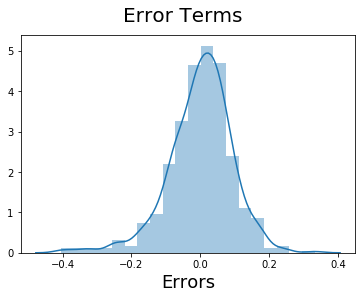

In [90]:
# Plot the distribution of errors
fig=plt.figure()
sns.distplot((res),bins=20)
fig.suptitle('Error Terms',fontsize=20)
plt.xlabel('Errors',fontsize=18)
plt.show()

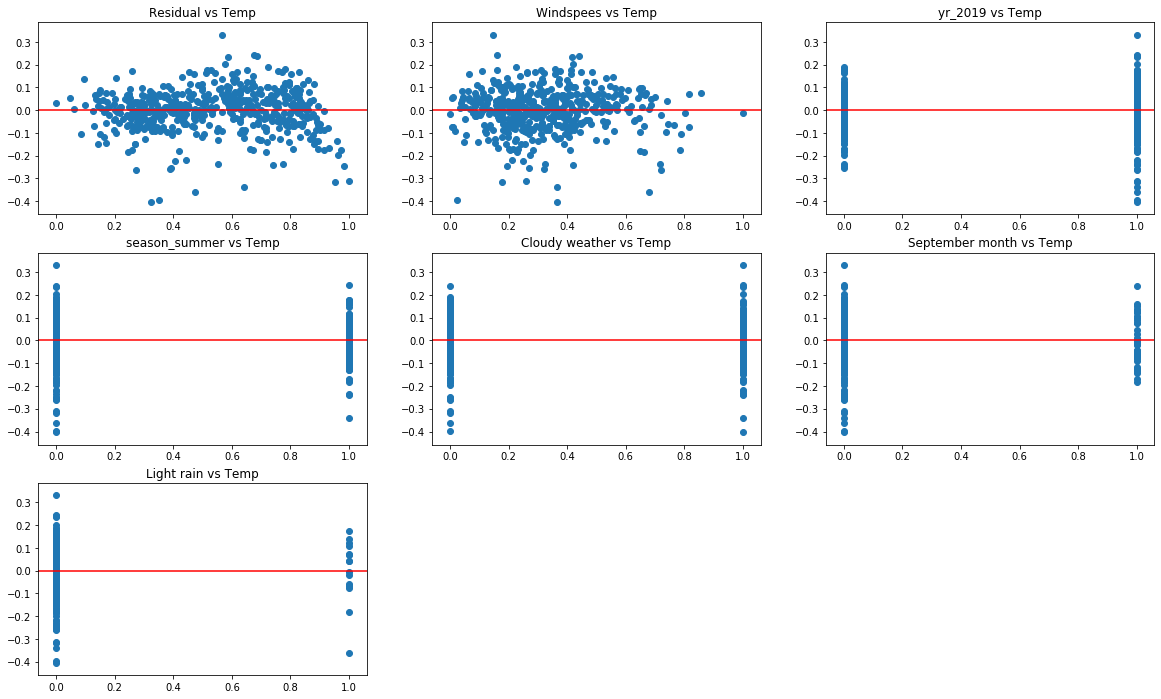

In [91]:
# Scatter Plot for all the residuals. Mostly all the means are being centered at 0

plt.figure(figsize=(20, 12))
plt.subplot(3,3,1)
plt.scatter(X_train['temp'],res)
plt.title("Residual vs Temp")
plt.axhline(y=0, color='r', linestyle='-')
plt.subplot(3,3,2)
plt.scatter(X_train['windspeed'],res)
plt.title("Windspees vs Temp")
plt.axhline(y=0, color='r', linestyle='-')
plt.subplot(3,3,3)
plt.scatter(X_train['yr_2019'],res)
plt.title("yr_2019 vs Temp")
plt.axhline(y=0, color='r', linestyle='-')
plt.subplot(3,3,4)
plt.scatter(X_train['season_summer'],res)
plt.title("season_summer vs Temp")
plt.axhline(y=0, color='r', linestyle='-')
plt.subplot(3,3,5)
plt.scatter(X_train['weathersit_Cloudy'],res)
plt.title("Cloudy weather vs Temp")
plt.axhline(y=0, color='r', linestyle='-')
plt.subplot(3,3,6)
plt.scatter(X_train['mnth_Sept'],res)
plt.title("September month vs Temp")
plt.axhline(y=0, color='r', linestyle='-')
plt.subplot(3,3,7)
plt.scatter(X_train['weathersit_Light Rain'],res)
plt.title("Light rain vs Temp")
plt.axhline(y=0, color='r', linestyle='-')
plt.show()

# <b style='color:green;'>Prediction on Test setup:</b>

-  We need to so same scaling on the test set that we did on the prediction set.
-  We never use .fit on the test set because in ML we never use test set to make predictions or anything. Our test set is the unseen data and we still don't have it. We pretend we don't have that data. 
-  We only transform on the test set and not fit.

In [92]:
#  Transform the numerical variables 
num_vars = ['temp','atemp','hum','casual','registered','windspeed','cnt']

df_test[num_vars] = scaler.transform(df_test[num_vars])

### Dividing the test set into x_test and y_test

In [93]:
# Splitting df_test into X_test and y_test
y_test = df_test.pop('cnt')
X_test = df_test

In [94]:
# Adding constant variable to test dataframe
X_test_m5 = sm.add_constant(X_test)

In [95]:
X_test_m5 = X_test_m5.drop(['atemp','hum', 'casual', 'registered','holiday_No Holiday', 'workingday_workingday', 'season_spring','mnth_Aug', 'mnth_Dec', 'mnth_Feb','mnth_Jan', 'mnth_July', 'mnth_June', 'mnth_Mar', 'mnth_May','mnth_Nov', 'mnth_Oct','weekday_Mon', 'weekday_Sat','weekday_Sun', 'weekday_Thurs', 'weekday_Tue', 'weekday_Wed'], axis = 1)

In [96]:
# Making predictions using the fourth model
y_pred_m5 = lr_19.predict(X_test_m5)

In [97]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [98]:
r_squared = r2_score(y_test, y_pred_m5)
r_squared

0.7434807383896255

### Model Evaluation

Text(0, 0.5, 'y_pred')

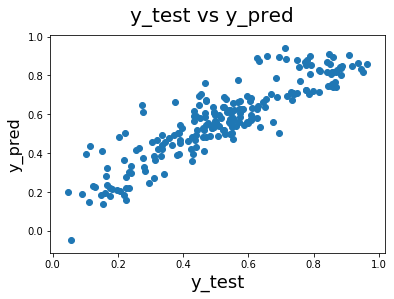

In [99]:
# Plot the y_test and y_pred on a graphic
fig = plt.figure()
plt.scatter(y_test, y_pred_m5)
fig.suptitle('y_test vs y_pred', fontsize = 20)              # Plot heading 
plt.xlabel('y_test', fontsize = 18)                          # X-label
plt.ylabel('y_pred', fontsize = 16) 

# Final Equation


We can see that the equation of our best fitted line is:

<b style='color:red;'>$ y = 0.1209 + 0.5527  \times  temp -0.1552 \times windspeed + 0.2332 \times Year2019 + 0.0894 \times summer + 1.48 \times cloudy+ 0.1281 \times winter + 0.0978 \times sept -0.2785 \times light-rain $r</b>

